In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

## 1. Tratamento e Limpeza de Dados

##### Os dados originais estavam distribuídos em arquivos CSV separados por ano (2014-2024), e cada um apresentava inconsistências estruturais que precisavam ser corrigidas antes da análise.

##### **Principais Desafios e Soluções:**
##### 1.  **Colunas Extras e Corrompidas**: Dependendo do ano, os arquivos CSV continham colunas extras no final. Essas colunas eram, em sua maioria, vazias ou continham dados corrompidos ("lixo"), com menos de 1% de informações úteis. A quantidade dessas colunas variava (de 3 a 7, dependendo do arquivo). A solução foi remover programaticamente essas colunas de cada DataFrame anual.
##### 2.  **Linhas Vazias ou de Metadados**: A primeira e a última linha de cada CSV estavam consistentemente vazias ou continham totais que não faziam parte dos registros de despesas. Essas linhas foram removidas para garantir que apenas os dados válhos fossem processados.

##### Após a aplicação dessas etapas de limpeza para cada ano, todos os DataFrames foram concatenados em um único conjunto de dados. Esse processo resultou em um DataFrame unificado e com estrutura consistente, pronto para as próximas etapas de análise e modelagem.

In [118]:
df24 = pd.read_csv('consultaDespesa_Prefeitura_Teixeira_2024.csv', sep=';')
df24 = df24.drop(df24.columns[[28, 29, 30, 31]], axis=1)
df24 = df24.drop([0, 8682], axis=0)

df23 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2023.csv', sep=';')
df23 = df23.drop(df23.columns[[28,29, 30, 31,32,33,34]], axis=1)
df23 = df23.drop([0, 9945], axis=0)

df22 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2022.csv', sep=';', )
df22 = df22.drop(df22.columns[[28,29, 30, 31]], axis=1)
df22 = df22.drop([0, 13102], axis=0)

df21 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2021.csv', sep=';')
df21 = df21.drop(df21.columns[[28,29, 30, 31]], axis=1)
df21 = df21.drop([0, 10744], axis=0)

df20 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2020.csv', sep=';')
df20 = df20.drop(df20.columns[[28,29, 30, 31]], axis=1)
df20 = df20.drop([0, 6378], axis=0)

df19 = pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2019.csv', sep=';')
df19 = df19.drop(df19.columns[[28,29, 30, 31]], axis=1)
df19 = df19.drop([0, 5719], axis=0)

df18= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2018.csv', sep=';', )
df18 = df18.drop(df18.columns[[28,29, 30, 31]], axis=1)
df18 = df18.drop([0, 5297], axis=0)

df17= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2017.csv', sep=';')
df17 = df17.drop(df17.columns[[28,29, 30, 31]], axis=1)
df17 = df17.drop([0, 6082], axis=0)

df16= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2016.csv', sep=';')
df16 = df16.drop(df16.columns[[28,29, 30, 31]], axis=1)
df16 = df16.drop([0, 8391], axis=0)

df15= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2015.csv', sep=';')
df15 = df15.drop(df15.columns[[28,29, 30, 31,32]], axis=1)
df15 = df15.drop([0, 6977], axis=0)

df14= pd.read_csv('consultaDespesa_Prefeitura _Teixeira_2014.csv', sep=';')
df14 = df14.drop(df14.columns[[28,29, 30, 31,32]], axis=1)
df14 = df14.drop([0, 5589], axis=0)

df = pd.concat([df24, df23, df22, df21, df20 ,df19 ,df18 ,df17 ,df16, df15,df14])

## 2. Análise Exploratória e Seleção de Features

##### Após a limpeza inicial, o foco da análise foi direcionado para as despesas relacionadas a licitações, filtrando o DataFrame para incluir apenas os registros onde a coluna "Licitação" era "SIM". Isso resultou em um conjunto de dados com aproximadamente 15 mil registros.

##### A próxima etapa consistiu em uma análise exploratória para selecionar as features mais relevantes para o modelo de detecção de anomalias. O critério de seleção combinou:
##### 1.  **Relevância para o Domínio**: Variáveis que, por sua natureza, são importantes para descrever uma despesa pública (como `Função`, `Fonte Recurso`, etc.).
##### 2.  **Distribuição dos Dados**: Foi verificado o `value_counts()` de cada coluna categórica. Colunas com baixa variabilidade (ou seja, onde uma única categoria representava a grande maioria dos dados) foram descartadas por terem baixo poder preditivo.

##### Uma característica positiva dos dados é que a maioria das colunas categóricas já possui um código numérico associado, o que facilita o tratamento e a conversão para um formato que o modelo de machine learning possa utilizar.

##### As features inicialmente consideradas mais promissoras para a análise foram:
*   `Data`
*   `Fonte Recurso`
*   `Unid. Orc`
*   `Função`
*   `Subfunção`
*   `Programa`
*   `Ação`
*   `Elemento`
*   `Valor Empenhado`


O DataFrame `df`, contendo todas as despesas, é filtrado para criar um novo DataFrame `df2`. Este novo conjunto de dados contém exclusivamente os registros onde a coluna "Licitação" tem o valor "SIM", focando a análise apenas nas despesas de licitação.

In [119]:
df2 = df[df["Licitação"] == "SIM"]

In [120]:
df2

,Unnamed: 0,Número,Data,Nome,CPF/CNPJ,Licitação,Nº Licitação,Histórico,Fonte Recurso,Modalidade,...,Elemento,Valor Fixado,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Anulado,Valor Saldo,Data de Pagamento,Data de Liquidação,Data de Liquidação
50,DL,187,12/01/2024,ONI TELECOM SERVICOS E COMERCIO LTDA,***.660.000-**,SIM,000092022,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,15001000 - Recursos Livres (Ordinário),0 - Ordinário,...,40 - Serviços De Tecnologia Da Informação E Co...,"5.000,00","750,00","750,00","750,00",NaN,"0,00",22/01/2024,12/01/2024,NaN
51,DL,191,12/01/2024,MIRELLY SANTOS LEITE,***.449.477-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
52,DL,192,12/01/2024,VALDEMIR LAURENTINO DA SILVA,***.863.405-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
53,DL,193,12/01/2024,RUBENI NUNES DE SOUZA,***.912.484-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
54,DL,194,12/01/2024,LYSANDRA DA SILVA MARTINS,***.931.408-**,SIM,000092023,VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...,16600000 - Transferência de Recursos do Fundo ...,0 - Ordinário,...,92 - Despesas De Exercícios Anteriores,"3.000,00","315,78","315,78","315,78",NaN,"0,00",12/01/2024,12/01/2024,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,DL,4733,21/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","15.126,25","15.126,25","0,00",NaN,"15.126,25",NaN,21/11/2014,NaN
5584,DL,4781,28/11/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","6.528,75","6.528,75","0,00",NaN,"6.528,75",NaN,28/11/2014,NaN
5586,DL,5266,24/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,0 - Ordinário,...,32 - Material de Distribuição Gratuita,"630,00","11.397,20","11.397,20","0,00",NaN,"11.397,20",NaN,24/12/2014,NaN
5587,DL,5269,26/12/2014,FARMACIA SANTA MARIA MADALENA LTDA,***.599.000-**,SIM,000132014,DESPESA QUE SE EMPENHA REFERENTE AO PAGAMENTO ...,8 - FUS,2 - Global,...,32 - Material de Distribuição Gratuita,"630,00","7.022,32","7.022,32","0,00",NaN,"7.022,32",NaN,26/12/2014,NaN


In [121]:
df2.iloc[1,:]

Unnamed: 0                                                            DL
 Número                                                              191
Data                                                          12/01/2024
Nome                                                MIRELLY SANTOS LEITE
CPF/CNPJ                                                  ***.449.477-**
Licitação                                                            SIM
Nº Licitação                                                   000092023
Histórico              VALOR QUE SE EMPENHA PARA ATENDER AO PAGAMENTO...
Fonte Recurso          16600000 - Transferência de Recursos do Fundo ...
Modalidade                                                 0 - Ordinário
Órgão                               2 - Prefeitura Municipal de Teixeira
Unid. Orc               2120 - Fundo Municipal de Ação e Promoção Social
Função                                            8 - Assistência Social
Subfunção                                  244 - As

Para refinar o conjunto de dados, foi realizada uma análise da distribuição de valores em várias colunas categóricas usando `value_counts()`. Com base nessa análise e na relevância para o problema, as seguintes ações foram tomadas:
 1.  **Seleção de Features**: Colunas como `Elemento` e `Fonte Recurso` foram consideradas promissoras, enquanto `Natureza`, `Modalidade` e `Categoria Econômica` foram avaliadas como menos relevantes devido à sua baixa variabilidade ou correlação com anomalias.
 2.  **Remoção de Colunas**: Uma limpeza extensiva foi feita, removendo colunas que não seriam utilizadas no modelo, como identificadores (`Número`, `Nome`), dados textuais (`Histórico`), colunas financeiras redundantes (mantendo apenas `Valor Empenhado`) e as colunas categóricas descartadas na etapa anterior.
 3.  **Conversão de Tipo**: A coluna `Valor Empenhado`, que estava em formato de texto (string), foi convertida para um formato numérico para possibilitar cálculos e análises quantitativas.


In [122]:
print(df2["Elemento"].value_counts())

Elemento
30 - Material de Consumo                                                                  5118
39 - Outros Serviços de Terceiros - Pessoa Jurídica                                       3307
36 - Outros Serviços de Terceiros - Pessoa Física                                         2657
30 - Material De Consumo                                                                   962
36 - Outros Serviços De Terceiros - Pessoa Física                                          798
39 - Outros Serviços De Terceiros - Pessoa Jurídica                                        760
32 - Material de Distribuição Gratuita                                                     508
35 - Serviços de Consultoria                                                               208
52 - Equipamentos e Material Permanente                                                    172
51 - Obras e Instalações                                                                   169
90 - Aplicações Diretas                  

In [123]:
#Boa relação com anomalias? Acho que não.
print(df2["Natureza"].value_counts())

Natureza
3 - OUTRAS DESPESAS CORRENTES                                                                                        11940
3 - Outras Despesas Correntes                                                                                         2648
4 - INVESTIMENTOS                                                                                                      341
4 - Investimentos                                                                                                       99
3 - Despesas Correntes                                                                                                  78
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS       29
3 - DESPESAS CORRENTES                                                                                                  23
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         11
4 - DES

In [124]:
# não vejo boa correlaçao disso com anomalia
print(df2["Modalidade"].value_counts())

Modalidade
0 - Ordinário                                                                                                                                                                                                            14678
2 - Global                                                                                                                                                                                                                 350
16320000 - Transferências do Estado referentes a Convênios e Instrumentos Congêneres vinculados à Saúde                                                                                                                     51
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde                                                                     32
 E, QUE SERÃO PAGOS COM RECURSO PROVENIENTE DO BLOCO PARA A MANUTENÇÃO DAS AÇÕES E SERVIÇOS PÚBLI

In [125]:
#coluna com provavel boa correlação com questão de anomalia

print(df2["Fonte Recurso"].value_counts())

Fonte Recurso
15001000 - Recursos Livres (Ordinário)                                                                                                                       1901
0 - Recursos Ordinários                                                                                                                                      1038
16000000 - Transferências Fundo a Fundo de Recursos do SUS provenientes do Governo Federal - Bloco de Manutenção das Ações e Serviços Públicos de Saúde       904
1001 - Recursos Ordinários                                                                                                                                    839
15001002 - Recursos não Vinculados de Impostos - Saúde                                                                                                        737
                                                                                                                                                             ... 
 PROCESSO ADMI

In [126]:
# nao compensa essa coluna
print(df2["Categoria Econômica"].value_counts())

Categoria Econômica
3 - DESPESAS CORRENTES                                                                                               11940
3 - Despesas Correntes                                                                                                2648
4 - DESPESAS DE CAPITAL                                                                                                342
4 - Despesas De Capital                                                                                                 99
1003 - Implementar novo modelo de gestão na Saúde                                                                       47
2019 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco Atenção Especializada-MAC - SUS         39
2015 - Manutenção da Unidade Mista Sancho Leite-RECURSOS PRÓPRIOS                                                       28
2018 - Manutenção das Atividades das Ações e Serviços Públicos de Saúde - Bloco da Assistência Farmacêutica - SUS      

In [127]:
df2 = df2.drop([
    "Unnamed: 0",
    " Número",
    "Nome",
    "CPF/CNPJ",
    "Licitação",
    "Nº Licitação",
    "Histórico",
    "Órgão",
    "Categoria Econômica",
    "Natureza",
    "Aplicação",
    "Valor Fixado",
    "Valor Liquidado",
    "Valor Pago",
    "Valor Anulado",
    " Valor Saldo",
    "Data de Pagamento",
    " Data de Liquidação",
    "Data de Liquidação",
    "Modalidade"
], axis = 1)

In [128]:
df2['Valor Empenhado'] = (
    df2['Valor Empenhado']
    .str.replace('.', '', regex=False)   # Remove separadores de milhar
    .str.replace(',', '.', regex=False) 
    .pipe(pd.to_numeric, errors='coerce') # Converte para float, ignorando erros
)

In [129]:
df2

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
50,12/01/2024,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00
51,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
52,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
53,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
54,12/01/2024,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78
...,...,...,...,...,...,...,...,...,...
5583,21/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25
5584,28/11/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75
5586,24/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20
5587,26/12/2014,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32


In [130]:
df2.dtypes

Data                object
Fonte Recurso       object
Unid. Orc           object
Função              object
Subfunção           object
Programa            object
Ação                object
Elemento            object
Valor Empenhado    float64
dtype: object

In [131]:
df2.describe()

,Valor Empenhado
count,15134.000000
mean,8479.552755
std,26000.675153
min,0.000000
25%,1300.000000
50%,2490.045000
75%,6208.352500
max,635784.590000


Após a verificação, constatou-se que a quantidade de linhas com valores nulos era insignificante (inferior a 1% do total). A estratégia adotada foi a exclusão completa desses registros (`dropna()`), pois essa abordagem simplifica o pré-processamento sem introduzir viés ou impactar negativamente a análise subsequente.

In [132]:
df2.isnull().sum()

Data                0
Fonte Recurso      29
Unid. Orc          35
Função             35
Subfunção          35
Programa           35
Ação               35
Elemento           35
Valor Empenhado    85
dtype: int64

In [133]:
df2 = df2.dropna()

#### Análise do Valor Máximo Empenhado

In [134]:
maximo = df2[(df2['Valor Empenhado'] >= 635784.590000)] 
maximo

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado
5503,04/07/2016,50 - Transferência de Convênios  Educação  F...,2080 - Secretaria de Educação,12 - Educação,361 - Ensino Fundamental,1027 - Programa de Revitalização do Ensino Fun...,1043 - Const. e Ampl.e Reforma de Unidades Esc...,51 - Obras e Instalações,635784.59


#### Criação das Colunas 'Ano' e 'Categoria'
Para facilitar a análise temporal e o agrupamento por área, foram realizadas duas transformações:
1.  A coluna `Data` foi convertida para o formato datetime e utilizada para extrair o `Ano` de cada registro.
2.  As diversas descrições da coluna `Função` foram mapeadas para categorias unificadas (ex: 'saude', 'educacao'), criando a nova feature `categoria`.

In [135]:
df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y', errors='coerce')
df2.dropna(subset=['Data'], inplace =True)               
df2.loc[:, 'Ano'] = df2['Data'].dt.year.astype(int) #coloca os anos em inteiros

C:\Users\nunes\AppData\Local\Temp\ipykernel_19140\631513773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Data'] = pd.to_datetime(df2['Data'], format='%d/%m/%Y', errors='coerce')
C:\Users\nunes\AppData\Local\Temp\ipykernel_19140\631513773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['Data'], inplace =True)
C:\Users\nunes\AppData\Local\Temp\ipykernel_19140\631513773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Após as transformações anteriores, foi verificado se existiam registros completamente idênticos no conjunto de dados. A contagem inicial confirmou a presença de duplicatas, que foram subsequentemente removidas com `drop_duplicates()` para garantir a integridade e a unicidade dos dados na análise.

In [136]:
df2.duplicated().sum()

1233

In [137]:
df2 = df2.drop_duplicates()

In [138]:
funcoes={
    '8 - Assistência Social' : 'social',
    '10 - Saúde' : 'saude',
    '2080 - Fundo Municipal de Saúde' : 'saude',
    '4 - Administração' : 'administracao',
    '2040 - Secretaria de Administração' : 'administracao',
    '20 - Agricultura' : 'agricultura',
    '2090 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '13 - Cultura' : 'cultura',
    '12 - Educação' : 'educacao',
    '2150 - Secretaria de Educação' : 'educacao',
    '15 - Urbanismo' : 'urbanizacao',
    '2170 - Secretaria de Infraestrutura e Serviços Urbanos' : 'urbanizacao',
    '2050 - Secretaria de Saúde' : 'saude',
    '2090 - Fundo Municipal de Saúde' : 'saude',
    '2080 - Secretaria de Educação' : 'educacao',
    '2020 - Secretaria de Administração' : 'administracao',
    '2060 - Secretaria de Agricultura,Pecuária e Abastecimento' : 'agricultura',
    '2110 - Secretaria de Planejamento' : 'urbanizacao',
}

df2['categoria'] = df2['Função'].map(funcoes)

#### Análise da Evolução dos Gastos com Licitações
O gráfico revela um crescimento expressivo nos gastos com licitações, que aumentaram em mais de R$ 20 milhões ao longo da última década. Para um município com aproximadamente 15 mil habitantes, esse aumento substancial justifica uma investigação aprofundada sobre a efetividade e o retorno desses investimentos para a população.

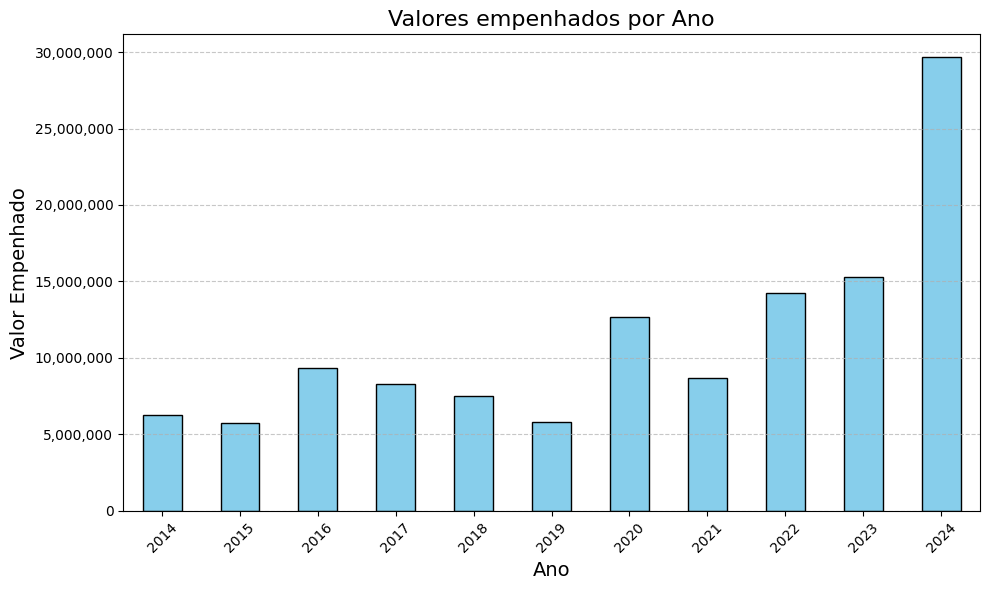

In [139]:
valores_por_ano = df2.groupby('Ano')['Valor Empenhado'].sum()

plt.figure(figsize=(10, 6))
valores_por_ano.plot(kind='bar', color=['skyblue'], edgecolor='black')
plt.title('Valores empenhados por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=14)
plt.ylabel('Valor Empenhado', fontsize=14)
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))  #ajusta a escala do eixo y para milhões
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



#### Análise Comparativa dos Gastos por Área
O gráfico de linhas permite uma análise comparativa da trajetória de crescimento dos gastos entre as diferentes áreas (categorias), revelando quais setores mais contribuíram para o aumento geral das despesas observado anteriormente.


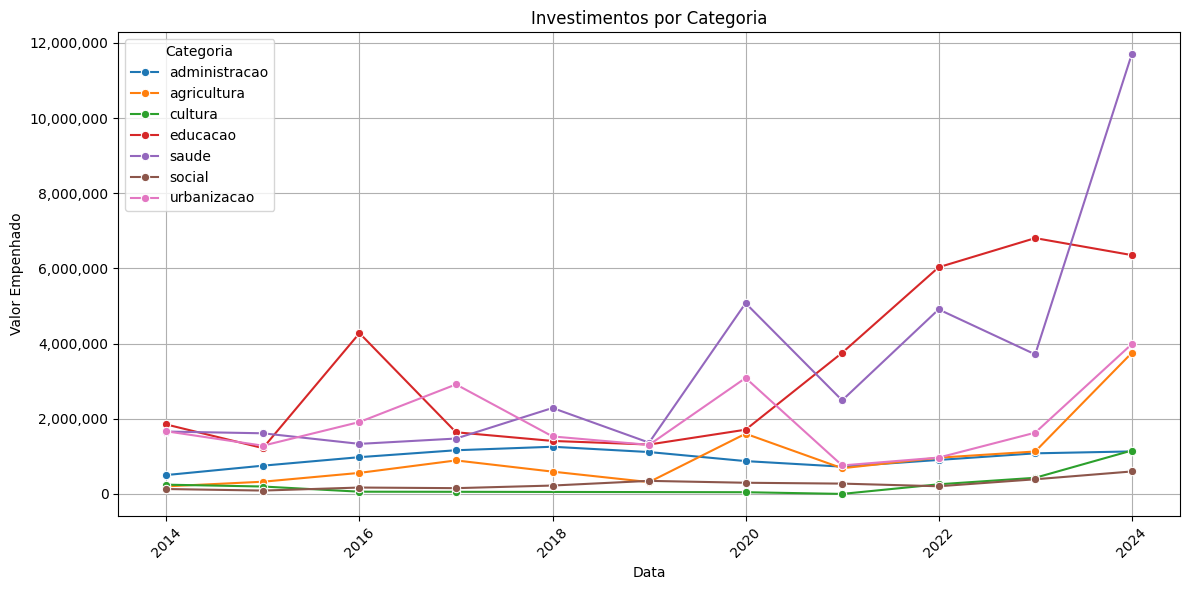

In [140]:
df_categorias = df2.groupby(['Ano', 'categoria'])[['Valor Empenhado']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_categorias, x='Ano', y='Valor Empenhado', hue='categoria', marker='o')


plt.title('Investimentos por Categoria')
plt.xlabel('Data')
plt.ylabel('Valor Empenhado')
plt.gca().yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.xticks(rotation=45)
plt.grid()
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()

#### Análise dos Gastos por Setor
A análise detalhada por categoria confirma que **Saúde** e **Educação** lideram os gastos, sendo os principais impulsionadores do aumento geral das despesas. É particularmente notável o crescimento abrupto na área da **Saúde**, que registrou uma triplicação em seu orçamento de licitações em um único ano. A tabela a seguir quantifica a variação percentual dos gastos para cada setor entre o início e o fim do período analisado.

In [141]:
df_filtered = df_categorias[df_categorias['Ano'].isin([2014, 2024])]
df_pivot = df_filtered.pivot(index='categoria', columns='Ano', values='Valor Empenhado')
df_pivot['Aumento (%)'] = ((df_pivot[2024] - df_pivot[2014]) / df_pivot[2014]) * 100
df_pivot['Aumento (%)'] = df_pivot['Aumento (%)'].round(2)
df_pivot


Ano,2014,2024,Aumento (%)
categoria,,,
administracao,503981.24,1132390.94,124.69
agricultura,203339.28,3752133.43,1745.26
cultura,247640.00,1155442.57,366.58
educacao,1848862.69,6356383.38,243.80
saude,1661338.58,11698670.28,604.17
social,131967.27,599122.10,353.99
urbanizacao,1667897.28,3986094.75,138.99


#### Preparação dos Dados para Detecção de Anomalias

A análise exploratória revelou as tendências gerais de gastos. Agora, o foco se volta para a identificação de transações individuais que fogem do padrão. Para isso, iniciaremos a preparação dos dados para a aplicação de um modelo de machine learning, convertendo features categóricas em numéricas e criando a base para a detecção de anomalias.

In [142]:
df4 = df2.copy()

In [143]:
df4['Mes'] = df4['Data'].dt.month
df4['Dia'] = df4['Data'].dt.day

In [144]:
#extraindo os codigos das categorias

df4['Fonte_Recurso_codigo'] = df4['Fonte Recurso'].str.extract(r'^(\d+)').astype(float)
df4['Unid_Orc_codigo'] = df4['Unid. Orc'].str.extract(r'^(\d+)').astype(float)
df4['Funcao_codigo'] = df4['Função'].str.extract(r'^(\d+)').astype(float)
df4['Subfuncao_codigo'] = df4['Subfunção'].str.extract(r'^(\d+)').astype(float)
df4['Programa_codigo'] = df4['Programa'].str.extract(r'^(\d+)').astype(float)
df4['Acao_codigo'] = df4['Ação'].str.extract(r'^(\d+)').astype(float)
df4['Elemento_codigo'] = df4['Elemento'].str.extract(r'^(\d+)').astype(float)

In [145]:
df4.head()

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,categoria,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo
50,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,social,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0
51,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
112,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,social,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0
119,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,social,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0
120,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,social,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0


#### Rotulação Não Supervisionada para Classificação

Para treinar modelos de classificação, precisamos de um alvo (target). Como nossos dados não são rotulados, aplicamos uma técnica de detecção de anomalias não supervisionada, o *Isolation Forest*, para criar esses rótulos. As transações identificadas como outliers pelo algoritmo serão marcadas como "anomalia" (-1).

In [146]:
print(df4.columns[[8,9,11,12,13,14,15,16,17,18,19]].tolist())
df4 = df4.dropna()

cols = ['Mes','Dia','Fonte_Recurso_codigo','Unid_Orc_codigo','Funcao_codigo',
        'Subfuncao_codigo','Programa_codigo','Acao_codigo','Elemento_codigo',
        'Valor Empenhado','Ano']  
Treino = df4[cols].copy()


['Valor Empenhado', 'Ano', 'Mes', 'Dia', 'Fonte_Recurso_codigo', 'Unid_Orc_codigo', 'Funcao_codigo', 'Subfuncao_codigo', 'Programa_codigo', 'Acao_codigo', 'Elemento_codigo']


In [147]:
from sklearn.ensemble import IsolationForest

model = IsolationForest(contamination=0.10, random_state=42)
df4['anomaly'] = model.fit_predict(Treino)
df4 = df4.reset_index(drop=True)

label:

- -1 → Anomalia  
  Rótulo atribuído pelo IsolationForest para outliers (transações atípicas). 
  Com contamination=0.10 o algoritmo rotula aproximadamente 10% das observações como anomalias. Aumentar esse parâmetro fará o modelo classificar mais registros como anomalia (inclusive casos com baixa probabilidade real). 

- 1 → Normal  
  Rótulo para observações consideradas inliers (comportamento esperado).

In [148]:
df4

,Data,Fonte Recurso,Unid. Orc,Função,Subfunção,Programa,Ação,Elemento,Valor Empenhado,Ano,...,Mes,Dia,Fonte_Recurso_codigo,Unid_Orc_codigo,Funcao_codigo,Subfuncao_codigo,Programa_codigo,Acao_codigo,Elemento_codigo,anomaly
0,2024-01-12,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,40 - Serviços De Tecnologia Da Informação E Co...,750.00,2024,...,1,12,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,40.0,1
1,2024-01-12,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,12,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
2,2024-01-17,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2041 - Manutenção das Atividades do Bloco de F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,4500.00,2024,...,1,17,16600000.0,2120.0,8.0,244.0,1002.0,2041.0,39.0,1
3,2024-01-18,16600000 - Transferência de Recursos do Fundo ...,2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2040 - Manutenção das Atividades Bloco da Prot...,92 - Despesas De Exercícios Anteriores,315.78,2024,...,1,18,16600000.0,2120.0,8.0,244.0,1002.0,2040.0,92.0,-1
4,2024-01-18,15001000 - Recursos Livres (Ordinário),2120 - Fundo Municipal de Ação e Promoção Social,8 - Assistência Social,244 - Assistência Comunitária,"1002 - Promoção social à família, à criança, a...",2049 - Fundo Municipal de Assistência Social/F...,39 - Outros Serviços De Terceiros - Pessoa Jur...,9200.00,2024,...,1,18,15001000.0,2120.0,8.0,244.0,1002.0,2049.0,39.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13618,2014-11-21,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,15126.25,2014,...,11,21,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13619,2014-11-28,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,6528.75,2014,...,11,28,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13620,2014-12-24,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,11397.20,2014,...,12,24,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1
13621,2014-12-26,8 - FUS,2050 - Secretaria de Saúde,10 - Saúde,301 - Atenção Básica,2013 - Programa de Apoio Administrativo a SMS,2013 - Manutenção das Atividades Administrativ...,32 - Material de Distribuição Gratuita,7022.32,2014,...,12,26,8.0,2050.0,10.0,301.0,2013.0,2013.0,32.0,1


In [149]:
df4.duplicated().sum()

0

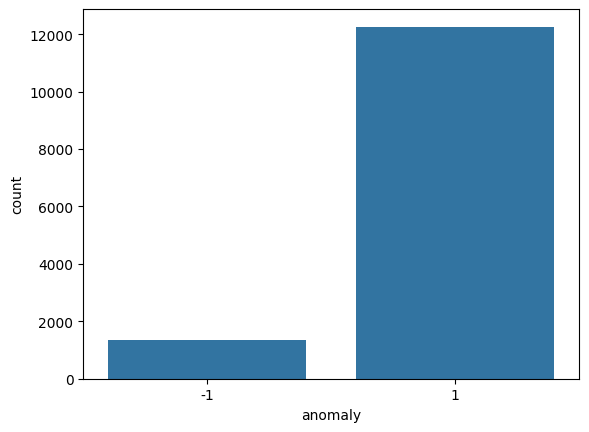

In [150]:
sns.countplot(data = df4, x = "anomaly");

### Análise de Anomalias por Categoria: Onde Focar a Investigação?

Após rotular as transações, o próximo passo é identificar em quais áreas (categorias) as anomalias se concentram. Uma simples contagem absoluta pode ser enganosa, pois áreas com maior volume de transações naturalmente terão mais anomalias.

Uma abordagem mais eficaz é calcular a **taxa de anomalia** para cada categoria. Isso nos permite identificar setores onde a *proporção* de transações atípicas é significativamente maior, independentemente do volume total de gastos. Essa análise é crucial para direcionar auditorias e investigações de forma mais eficiente.

**Metodologia:**
1.  **Contagem Absoluta:** Visualizar o número total de anomalias por categoria para entender a magnitude.
2.  **Cálculo da Taxa de Anomalia:** Para cada categoria, calcular `(Número de Anomalias / Total de Transações) * 100`.
3.  **Visualização Proporcional:** Criar um gráfico de barras que mostre a taxa de anomalia, permitindo uma comparação justa entre as categorias.

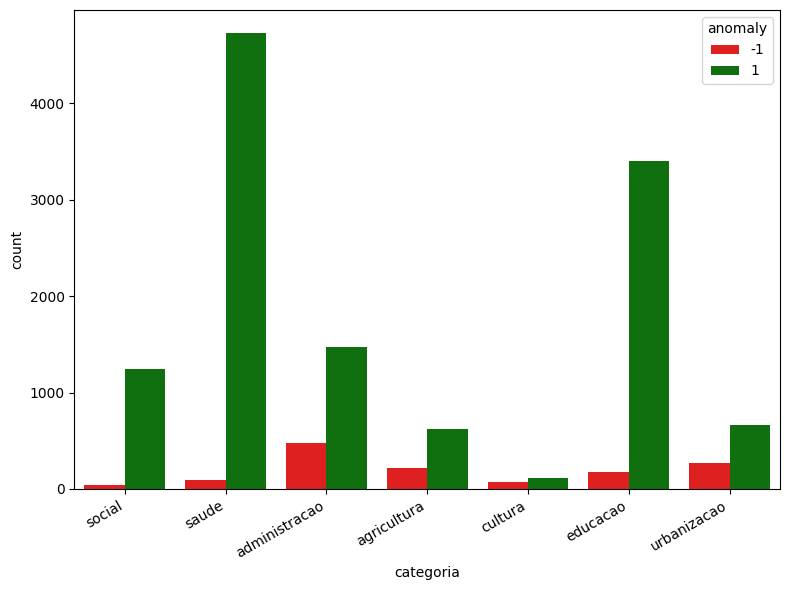

In [151]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df4, x="categoria", hue="anomaly", palette={-1: "red", 1: "green"})
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

### Análise e Transformação da Distribuição do 'Valor Empenhado'

**Objetivo:** Verificar a distribuição da feature `Valor Empenhado` e ajustá-la para otimizar o desempenho dos modelos de machine learning.

**Análise Inicial:**
- A visualização inicial através de um histograma e o cálculo da assimetria (skewness) revelam que a coluna `Valor Empenhado` possui uma **distribuição fortemente assimétrica à direita (positive skew)**.
- Isso significa que a maioria das transações tem valores baixos, mas existem alguns valores extremamente altos (outliers) que "puxam" a média e a distribuição.

**Problema:**
- Modelos sensíveis à escala e à distribuição dos dados, como SVM e Redes Neurais (devido à padronização com `StandardScaler`), podem ser negativamente impactados por essa assimetria. Os outliers podem dominar o processo de treinamento e padronização.

**Solução:**
- Para mitigar esse efeito, aplicamos uma **transformação logarítmica** (`np.log1p`). Essa técnica comprime a escala dos valores altos e expande a dos valores baixos, tornando a distribuição mais simétrica e próxima de uma distribuição normal. O uso de `log1p` (log(1+x)) é preferível ao `log` simples, pois lida corretamente com valores iguais a zero.

10.30941813301685


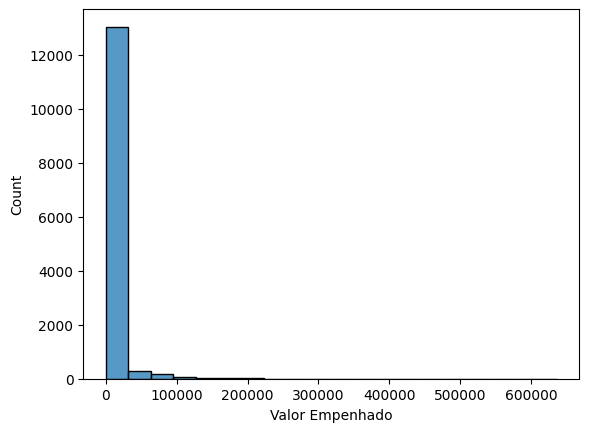

In [152]:
sns.histplot(data = df4, x = "Valor Empenhado", bins = 20);
print(df4["Valor Empenhado"].skew())

#### Aplicação da Transformação Logarítmica

Como a distribuição é fortemente assimétrica, uma transformação logarítmica (`log1p`) é aplicada. O objetivo é normalizar a distribuição da feature `Valor Empenhado`, reduzindo o impacto de outliers extremos no treinamento dos modelos e na etapa de padronização (`StandardScaler`).

In [153]:
df4['Valor Empenhado'] = np.log1p(df4['Valor Empenhado'])

-2.021590301890273


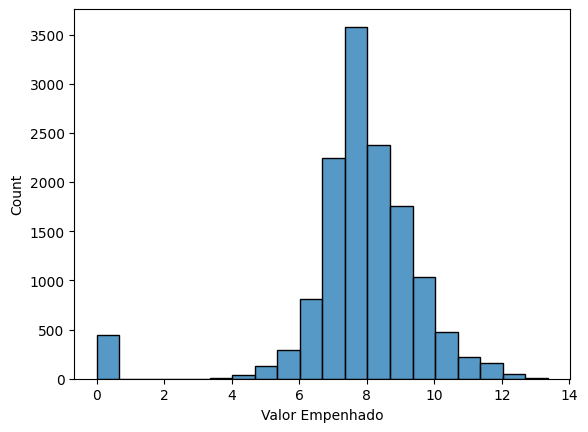

In [154]:
sns.histplot(data = df4, x = "Valor Empenhado", bins = 20);
print(df4["Valor Empenhado"].skew())

### Preparação do Dataset Desbalanceado para Modelagem

**Objetivo:** Preparar o conjunto de dados original (desbalanceado) para uma primeira rodada de modelagem. Esta etapa servirá como linha de base para avaliar o impacto do desbalanceamento de classes.

**Passos Realizados:**
1.  **Seleção de Features e Alvo:** As colunas numéricas (`X`) e a coluna alvo `anomaly` (`y`), gerada pelo *Isolation Forest*, são extraídas do dataset.
2.  **Divisão Estratificada (Train/Test Split):** O conjunto de dados é dividido em 80% para treino e 20% para teste. O parâmetro `stratify=y` é crucial para manter a proporção original de anomalias e transações normais em ambos os conjuntos.
3.  **Padronização dos Dados (StandardScaler):** As features são padronizadas para terem média zero e desvio padrão um. O `StandardScaler` é ajustado (`fit`) **apenas** nos dados de treino e, em seguida, aplicado (`transform`) tanto ao treino quanto ao teste para evitar vazamento de informações (*data leakage*).

In [155]:
df4 = df4.dropna()

In [ ]:
print("PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING")

X_desbalanceado = df4.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]].copy() 
y_desbalanceado = df4['anomaly'].copy()  

print(f"Dataset: {len(X_desbalanceado):,} registros financeiros")
print(f"Shape: {X_desbalanceado.shape}")
print(f"Classes: Normal={sum(y_desbalanceado==1)}, Anomalia={sum(y_desbalanceado==-1)}")
print("Features utilizadas:")
for i, col in enumerate(X_desbalanceado.columns):
    print(f"  {i+1}. {col}")

X_desbalanceado_train, X_desbalanceado_test, y_desbalanceado_train, y_desbalanceado_test = train_test_split(
    X_desbalanceado, y_desbalanceado, test_size=0.2, random_state=42, stratify=y_desbalanceado
)

print("\nDivisão dos dados:")
print(f"  Treino: {len(X_desbalanceado_train):,} registros ({len(X_desbalanceado_train)/len(X_desbalanceado)*100:.1f}%)")
print(f"  Teste: {len(X_desbalanceado_test):,} registros ({len(X_desbalanceado_test)/len(X_desbalanceado)*100:.1f}%)")

scaler = StandardScaler()
X_desbalanceado_train_scaled = scaler.fit_transform(X_desbalanceado_train)
X_desbalanceado_test_scaled = scaler.transform(X_desbalanceado_test)

print("\nDados normalizados com StandardScaler")
print(f"  Media antes: {X_desbalanceado_train.mean().mean():.4f}")
print(f"  Media depois: {X_desbalanceado_train_scaled.mean():.4f}")
print(f"  Desvio antes: {X_desbalanceado_train.std().mean():.4f}")  
print(f"  Desvio depois: {X_desbalanceado_train_scaled.std():.4f}")

train_anomalias = (y_desbalanceado_train == -1).sum()
train_normais = (y_desbalanceado_train == 1).sum()
test_anomalias = (y_desbalanceado_test == -1).sum() 
test_normais = (y_desbalanceado_test == 1).sum()

print("\nDistribuição das classes:")
print(f"  TREINO - Anomalias: {train_anomalias:,} ({train_anomalias/len(y_desbalanceado_train)*100:.1f}%) | Normais: {train_normais:,} ({train_normais/len(y_desbalanceado_train)*100:.1f}%)")
print(f"  TESTE  - Anomalias: {test_anomalias:,} ({test_anomalias/len(y_desbalanceado_test)*100:.1f}%) | Normais: {test_normais:,} ({test_normais/len(y_desbalanceado_test)*100:.1f}%)")

print("\n" + "=" * 80)

PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING
Dataset: 13,623 registros financeiros
Shape: (13623, 11)
Classes: Normal=12260, Anomalia=1363
Features utilizadas:
  1. Valor Empenhado
  2. Ano
  3. Mes
  4. Dia
  5. Fonte_Recurso_codigo
  6. Unid_Orc_codigo
  7. Funcao_codigo
  8. Subfuncao_codigo
  9. Programa_codigo
  10. Acao_codigo
  11. Elemento_codigo

Divisão dos dados:
  Treino: 10,898 registros (80.0%)
  Teste: 2,725 registros (20.0%)

Dados normalizados com StandardScaler
  Media antes: 587918.1043
  Media depois: 0.0000
  Desvio antes: 695916.5612
  Desvio depois: 1.0000

Distribuição das classes:
  TREINO - Anomalias: 1,090 (10.0%) | Normais: 9,808 (90.0%)
  TESTE  - Anomalias: 273 (10.0%) | Normais: 2,452 (90.0%)



### Modelagem com Árvore de Decisão (Dataset Desbalanceado)

**Objetivo:** Treinar um modelo inicial de Árvore de Decisão para estabelecer uma linha de base (baseline) de desempenho, utilizando o dataset original desbalanceado.

**Processo:**
1.  Um `DecisionTreeClassifier` é instanciado com `random_state=42` para garantir a reprodutibilidade.
2.  O modelo é treinado (`fit`) com os dados de treino desbalanceados e padronizados (`X_desbalanceado_train_scaled`).
3.  As predições são feitas tanto para o conjunto de treino quanto para o de teste para avaliar o desempenho.

**Análise dos Resultados:**
- **Overfitting Evidente:** As métricas no conjunto de treino são perfeitas (Acurácia e F1-Score de 1.0000), enquanto no conjunto de teste são significativamente inferiores. Isso demonstra que o modelo decorou os dados de treino, mas falha em generalizar para dados novos.
- **Impacto do Desbalanceamento:** O relatório de classificação mostra que, embora a acurácia geral seja alta, o modelo tem um desempenho muito fraco na identificação da classe minoritária ('Anomalia'). A baixa taxa de detecção de anomalias confirma que o modelo é ineficaz para o nosso objetivo principal.

**Conclusão:** Este modelo inicial, treinado nos dados desbalanceados e sem controle de complexidade, sofre de overfitting severo e é inadequado para a tarefa de detecção de anomalias.

In [ ]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_desbalanceado_train_scaled, y_desbalanceado_train)

y_desbalanceado_train_pred_dt = dt_model.predict(X_desbalanceado_train_scaled)
y_desbalanceado_test_pred_dt = dt_model.predict(X_desbalanceado_test_scaled)

train_acc_dt = accuracy_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt)
train_f1_dt = f1_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_desbalanceado_train, y_desbalanceado_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt)
test_f1_dt = f1_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_desbalanceado_test, y_desbalanceado_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_desbalanceado_test, y_desbalanceado_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_desbalanceado_test, y_desbalanceado_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_desbalanceado_test_pred_dt == -1).sum()
anomalias_reais = (y_desbalanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print("DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 1.0000
  F1-Score: 1.0000
  Precisao: 1.0000
  Recall: 1.0000

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9750
  F1-Score: 0.9748
  Precisao: 0.9747
  Recall: 0.9750

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.89      0.86      0.87       273
      Normal       0.98      0.99      0.99      2452

    accuracy                           0.98      2725
   macro avg       0.94      0.92      0.93      2725
weighted avg       0.97      0.98      0.97      2725


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 234    39]
     Norm  [  29  2423]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 263
  Taxa de deteccao: 85.71% (234/273)


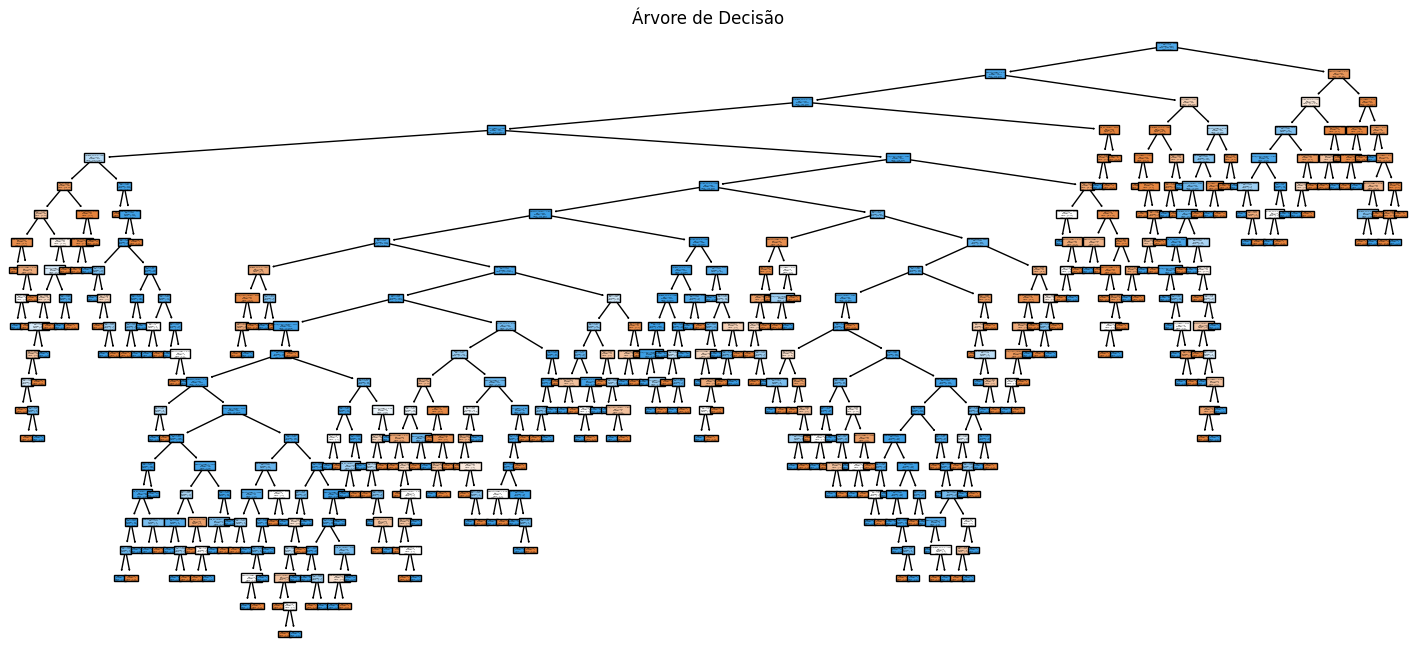

Profundidade da árvore: 21


In [158]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_desbalanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

### Tentativa de Poda da Árvore com Dataset Desbalanceado

**Objetivo:** Tentar mitigar o *overfitting* severo do modelo de Árvore de Decisão inicial, aplicando a técnica de Poda de Complexidade de Custo (Cost-Complexity Pruning) através do parâmetro `ccp_alpha`.

**Processo:**
1.  Foi utilizado o método `cost_complexity_pruning_path` para gerar uma série de valores de `ccp_alpha`.
2.  Para cada `alpha`, foi realizada uma validação cruzada para avaliar o desempenho do modelo e encontrar um valor que, teoricamente, oferecesse um bom equilíbrio entre complexidade e poder de generalização.

**Conclusão e Próximos Passos:**
A análise indicou que, mesmo com a poda, o desafio principal (o forte desbalanceamento de classes) não seria resolvido. A poda poderia reduzir a complexidade da árvore, mas dificilmente melhoraria a capacidade do modelo de identificar a classe minoritária (anomalias), que é o objetivo central do projeto.

Por essa razão, optamos por não prosseguir com a avaliação final de um modelo podado sobre os dados desbalanceados. A estratégia foi direcionada para uma abordagem mais promissora: o balanceamento do dataset antes de uma nova rodada de treinamento e otimização.

In [159]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_desbalanceado_train_scaled, y_desbalanceado_train)
ccp_alphas = path.ccp_alphas

In [160]:
scores = []
num_leaves = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    cv_score = cross_val_score(clf, X_desbalanceado_train_scaled, y_desbalanceado_train, cv=5, scoring='f1_weighted').mean()
    clf.fit(X_desbalanceado_train_scaled, y_desbalanceado_train)
    scores.append(cv_score)
    num_leaves.append(clf.get_n_leaves())

print(scores)
print(num_leaves)


[0.9733633095414292, 0.9733633095414292, 0.9733633095414292, 0.9735632227305174, 0.9735632227305174, 0.9735632227305174, 0.9735632227305174, 0.9735632227305174, 0.9735632227305174, 0.9733875225946086, 0.9733875225946086, 0.9735717878927466, 0.9735717878927466, 0.9735717878927466, 0.9733137191185488, 0.9733137191185488, 0.9733137191185488, 0.9733137191185488, 0.9733137191185488, 0.9733137191185488, 0.9733137191185488, 0.9734016541650622, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9733262274315603, 0.9734128921072932, 0.9734128921072932, 0.9733273974562099, 0.9734155270625255, 0.973527776751904, 0.973527776751904, 0.9738182383806239, 0.9738182383806239, 0.9740780150641294, 0.9749147681928017, 0.9749147681928017, 0.9749147681928017, 0

In [161]:
criterios = [(1 - s) + a * l for s, a, l in zip(scores, ccp_alphas, num_leaves)]
best_idx = np.argmin(criterios)
best_alpha = ccp_alphas[best_idx]

print(f"Melhor alpha: {best_alpha}")
print(f"Score: {scores[best_idx]}, Folhas: {num_leaves[best_idx]}")

Melhor alpha: 0.0
Score: 0.9733633095414292, Folhas: 267


### Balanceamento do Dataset

Os experimentos com o dataset desbalanceado revelaram um problema clássico de **overfitting**. O modelo de Árvore de Decisão, por exemplo, alcançou métricas perfeitas no conjunto de treino (F1-score de 1.000), indicando que havia memorizado os dados em vez de aprender a generalizar. Consequentemente, seu desempenho na detecção de anomalias em dados de teste foi extremamente baixo, tornando-o ineficaz para o objetivo do projeto.

Esse comportamento é comum em datasets com classes desbalanceadas, onde o modelo se torna enviesado para a classe majoritária ('Normal'). Para corrigir essa falha, foi aplicada a técnica de **Random Undersampling**:

1.  **Manter todas as observações da classe minoritária** (anomalias).
2.  **Reduzir aleatoriamente o número de observações da classe majoritária** (transações normais) até que a proporção entre as classes se torne equilibrada.

O resultado é a criação do `df_balanceado`, um novo conjunto de dados projetado para que os modelos de classificação aprendam os padrões de ambas as classes de forma mais justa, visando reduzir o overfitting e melhorar significativamente a capacidade de detectar anomalias reais.

In [162]:
anomalias = df4[df4['anomaly'] == -1]
normais = df4[df4['anomaly'] == 1].sample(n=6000, random_state=42)

df_balanceado = pd.concat([anomalias, normais]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
print("PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING COM OS DADOS BALANCEADOS")

X_balanceado = df_balanceado.iloc[:, [8,9,11,12,13,14,15,16,17,18,19]].copy() 
y_balanceado = df_balanceado['anomaly'].copy()  

print(f"Dataset: {len(X_balanceado):,} registros financeiros")
print(f"Classes: Normal={sum(y_balanceado==1)}, Anomalia={sum(y_balanceado==-1)}")
print("Features utilizadas:")
for i, col in enumerate(X_desbalanceado.columns):
    print(f"  {i+1}. {col}")

X_balanceado_train, X_balanceado_test, y_balanceado_train, y_balanceado_test = train_test_split(
    X_balanceado, y_balanceado, test_size=0.2, random_state=42, stratify=y_balanceado
)

print("\nDivisão dos dados:")
print(f"  Treino: {len(X_balanceado_train):,} registros ({len(X_balanceado_train)/len(X_balanceado)*100:.1f}%)")
print(f"  Teste: {len(X_balanceado_test):,} registros ({len(X_balanceado_test)/len(X_balanceado)*100:.1f}%)")

scaler = StandardScaler()
X_balanceado_train_scaled = scaler.fit_transform(X_balanceado_train)
X_balanceado_test_scaled = scaler.transform(X_balanceado_test)

print("\nDados normalizados com StandardScaler")
print(f"  Media antes: {X_balanceado_train.mean().mean():.4f}")
print(f"  Media depois: {X_balanceado_train_scaled.mean():.4f}")
print(f"  Desvio antes: {X_balanceado_train.std().mean():.4f}")  
print(f"  Desvio depois: {X_balanceado_train_scaled.std():.4f}")

train_anomalias = (y_balanceado_train == -1).sum()
train_normais = (y_balanceado_train == 1).sum()
test_anomalias = (y_balanceado_test == -1).sum() 
test_normais = (y_balanceado_test == 1).sum()

print("\nDistribuição das classes:")
print(f"  TREINO - Anomalias: {train_anomalias:,} ({train_anomalias/len(y_balanceado_train)*100:.1f}%) | Normais: {train_normais:,} ({train_normais/len(y_balanceado_train)*100:.1f}%)")
print(f"  TESTE  - Anomalias: {test_anomalias:,} ({test_anomalias/len(y_balanceado_test)*100:.1f}%) | Normais: {test_normais:,} ({test_normais/len(y_balanceado_test)*100:.1f}%)")

print("\n" + "=" * 80)

PREPARAÇÃO DOS DADOS PARA MACHINE LEARNING COM OS DADOS BALANCEADOS
Dataset: 7,363 registros financeiros
Classes: Normal=6000, Anomalia=1363
Features utilizadas:
  1. Valor Empenhado
  2. Ano
  3. Mes
  4. Dia
  5. Fonte_Recurso_codigo
  6. Unid_Orc_codigo
  7. Funcao_codigo
  8. Subfuncao_codigo
  9. Programa_codigo
  10. Acao_codigo
  11. Elemento_codigo

Divisão dos dados:
  Treino: 5,890 registros (80.0%)
  Teste: 1,473 registros (20.0%)

Dados normalizados com StandardScaler
  Media antes: 614133.1902
  Media depois: 0.0000
  Desvio antes: 701176.8266
  Desvio depois: 1.0000

Distribuição das classes:
  TREINO - Anomalias: 1,090 (18.5%) | Normais: 4,800 (81.5%)
  TESTE  - Anomalias: 273 (18.5%) | Normais: 1,200 (81.5%)



### Modelagem com Árvore de Decisão (Dataset Balanceado)

**Objetivo:** Treinar um novo modelo de Árvore de Decisão, desta vez utilizando o dataset balanceado, para avaliar o impacto do undersampling.

**Processo:**
1.  Um `DecisionTreeClassifier` é instanciado com `random_state=42`, sem parâmetros de poda.
2.  O modelo é treinado com os dados de treino balanceados e padronizados (`X_balanceado_train_scaled`).

**Análise dos Resultados:**
- **Overfitting Persiste:** O modelo novamente alcança métricas perfeitas no conjunto de treino (Acurácia e F1-Score de 1.0000). Isso indica que, embora o balanceamento tenha resolvido o viés de classe, a árvore ainda cresce sem controle e memoriza os dados de treino.
- **Melhora Drástica na Generalização:** Apesar do overfitting, o desempenho no conjunto de teste é drasticamente superior ao do modelo treinado com dados desbalanceados. A taxa de detecção de anomalias, que era o principal problema, saltou para aproximadamente 98%, provando a eficácia do balanceamento.

In [ ]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt = dt_model.predict(X_balanceado_train_scaled)
y_test_pred_dt = dt_model.predict(X_balanceado_test_scaled)

train_acc_dt = accuracy_score(y_balanceado_train, y_train_pred_dt)
train_f1_dt = f1_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_balanceado_train, y_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_balanceado_test, y_test_pred_dt)
test_f1_dt = f1_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_balanceado_test, y_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_balanceado_test, y_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_test_pred_dt == -1).sum()
anomalias_reais = (y_balanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print("DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO


METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 1.0000
  F1-Score: 1.0000
  Precisao: 1.0000
  Recall: 1.0000

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9599
  F1-Score: 0.9600
  Precisao: 0.9600
  Recall: 0.9599

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.89      0.89      0.89       273
      Normal       0.98      0.97      0.98      1200

    accuracy                           0.96      1473
   macro avg       0.93      0.93      0.93      1473
weighted avg       0.96      0.96      0.96      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 244    29]
     Norm  [  30  1170]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 274
  Taxa de deteccao: 89.38% (244/273)


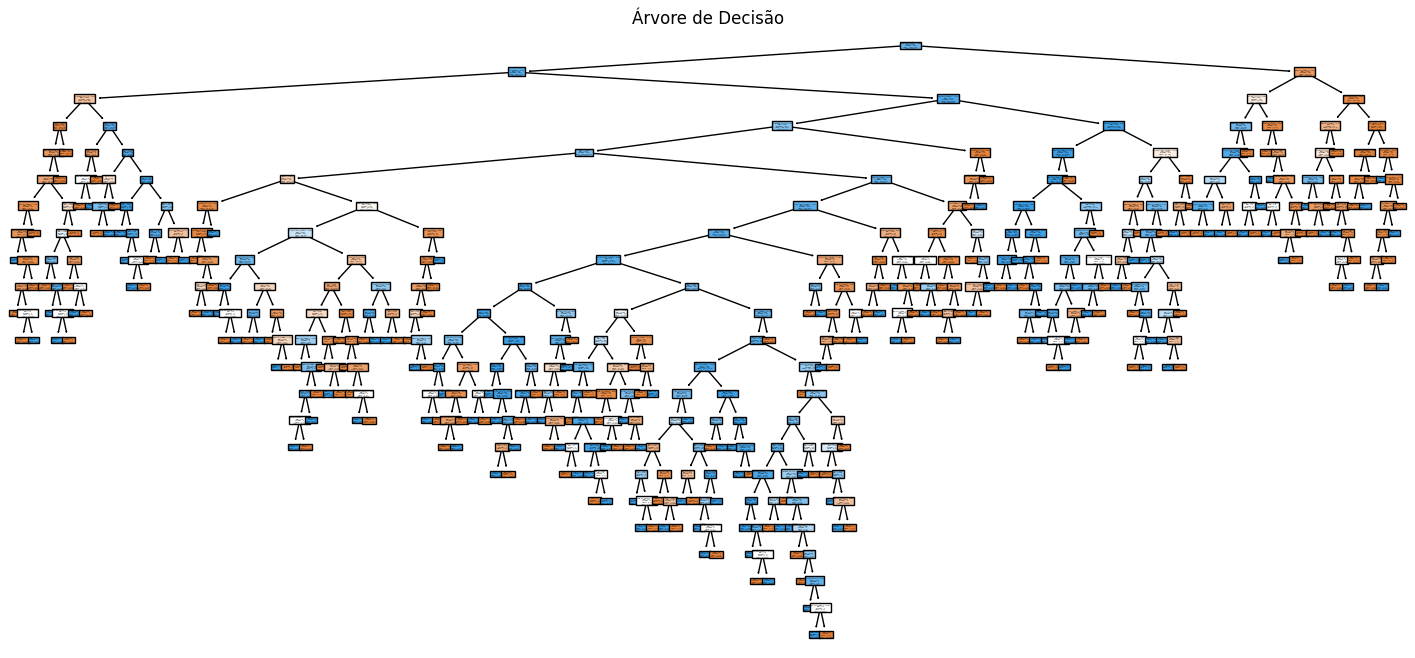

Profundidade da árvore: 22


In [165]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_balanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

O balanceamento foi um passo crucial e bem-sucedido. O próximo desafio é controlar a complexidade da árvore para reduzir o overfitting e melhorar ainda mais a generalização. Para isso, aplicaremos a Poda de Complexidade de Custo (Cost-Complexity Pruning - CCP) no dataset balanceado.

In [166]:
path = DecisionTreeClassifier(random_state=42).cost_complexity_pruning_path(X_balanceado_train_scaled, y_balanceado_train)
ccp_alphas = path.ccp_alphas

In [167]:
ccp_alphas = np.unique(ccp_alphas)
ccp_alphas = ccp_alphas[ccp_alphas > 0]

In [168]:
scores = []
num_leaves = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha)
    cv_score = cross_val_score(clf, X_balanceado_train_scaled, y_balanceado_train, cv=5, scoring='f1_weighted').mean()
    clf.fit(X_balanceado_train_scaled, y_balanceado_train)
    scores.append(cv_score)
    num_leaves.append(clf.get_n_leaves())

print(scores)
print(num_leaves)

[0.9565999851723526, 0.9565999851723526, 0.9565999851723526, 0.9565999851723526, 0.9565999851723526, 0.9565999851723526, 0.9567759915596061, 0.9568165793609908, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9569779824810503, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9568142804920656, 0.9582556069611936, 0.958657513045781, 0.9593406492301606, 0.9613504327578113, 0.9613504327578113, 0.9615298049805594, 0.9613683752738243, 0.9613683752738243, 0.9615635281810405, 0.9613854628351024, 0.9613854628351024, 0.9613854628351024, 0.9613854628351024, 0.9620449752675949, 0.9618672631881291, 0.9618672631881291, 

In [169]:
criterios_balanceado = [(1 - s) + a * l for s, a, l in zip(scores, ccp_alphas, num_leaves)]
menor_criterio = min(criterios_balanceado)
indices_menor_criterio = [i for i, c in enumerate(criterios_balanceado) if c == menor_criterio]
best_idx = min(indices_menor_criterio, key=lambda i: num_leaves[i])
best_alpha = ccp_alphas[best_idx]

print(f"Melhor alpha: {best_alpha}")
print(f"Score: {scores[best_idx]}, Folhas: {num_leaves[best_idx]}")

Melhor alpha: 8.10310233060658e-05
Score: 0.9565999851723526, Folhas: 237


### Otimização Manual da Poda da Árvore

**Observação:**
O valor de `ccp_alpha` ideal, calculado automaticamente na etapa anterior, ainda resultou em um modelo com um grau considerável de *overfitting* (desempenho muito alto no treino em comparação com o teste).

**Estratégia de Ajuste Manual:**
Para encontrar um equilíbrio melhor entre a complexidade do modelo e sua capacidade de generalização, optou-se por uma abordagem de ajuste manual e iterativa. Em vez de usar apenas o `ccp_alpha` calculado, foram testados diferentes valores para os parâmetros de poda, como:

*   `ccp_alpha`: Testando valores para forçar uma poda mais ou menos agressiva.
*   `max_depth`: Limitando a profundidade máxima da árvore.

O objetivo desta etapa é encontrar um valor de poda que reduza a complexidade da árvore (diminuindo o overfitting) sem sacrificar significativamente a performance no conjunto de teste, especialmente a taxa de detecção de anomalias.

In [170]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42, ccp_alpha= 0.00011 )
dt_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt = dt_model.predict(X_balanceado_train_scaled)
y_test_pred_dt = dt_model.predict(X_balanceado_test_scaled)

train_acc_dt = accuracy_score(y_balanceado_train, y_train_pred_dt)
train_f1_dt = f1_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_balanceado_train, y_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_balanceado_test, y_test_pred_dt)
test_f1_dt = f1_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_balanceado_test, y_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_balanceado_test, y_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_test_pred_dt == -1).sum()
anomalias_reais = (y_balanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9992
  F1-Score: 0.9992
  Precisao: 0.9992
  Recall: 0.9992

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9599
  F1-Score: 0.9600
  Precisao: 0.9600
  Recall: 0.9599

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.89      0.89      0.89       273
      Normal       0.98      0.97      0.98      1200

    accuracy                           0.96      1473
   macro avg       0.93      0.93      0.93      1473
weighted avg       0.96      0.96      0.96      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 244    29]
     Norm  [  30  1170]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 274
  Taxa de deteccao: 89.38% (244/273)


### Teste de Poda com `max_depth`

**Estratégia:**
Como primeira tentativa de poda manual, um novo modelo de Árvore de Decisão foi treinado limitando sua profundidade máxima a 11 (`max_depth=11`). O objetivo é verificar se essa simples restrição já é suficiente para reduzir o overfitting observado no modelo anterior (que tinha profundidade 21).

**Análise dos Resultados:**
- **Redução do Overfitting:** As métricas de treino não são mais perfeitas (Acurácia de ~0.99), e a diferença entre o desempenho de treino e teste diminuiu. Isso confirma que a limitação da profundidade está, de fato, simplificando o modelo e melhorando sua capacidade de generalização.
- **Manutenção do Desempenho:** O modelo manteve uma excelente performance no conjunto de teste, com acurácia e F1-Score em torno de 0.98.
- **Alta Taxa de Detecção:** Crucialmente, a taxa de detecção de anomalias permaneceu alta, em aproximadamente 98%.

In [171]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

dt_model = DecisionTreeClassifier(random_state=42, max_depth= 11)
dt_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt = dt_model.predict(X_balanceado_train_scaled)
y_test_pred_dt = dt_model.predict(X_balanceado_test_scaled)

train_acc_dt = accuracy_score(y_balanceado_train, y_train_pred_dt)
train_f1_dt = f1_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_precision_dt = precision_score(y_balanceado_train, y_train_pred_dt, average='weighted')
train_recall_dt = recall_score(y_balanceado_train, y_train_pred_dt, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt:.4f}")
print(f"  F1-Score: {train_f1_dt:.4f}")
print(f"  Precisao: {train_precision_dt:.4f}")
print(f"  Recall: {train_recall_dt:.4f}")

test_acc_dt = accuracy_score(y_balanceado_test, y_test_pred_dt)
test_f1_dt = f1_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_precision_dt = precision_score(y_balanceado_test, y_test_pred_dt, average='weighted')
test_recall_dt = recall_score(y_balanceado_test, y_test_pred_dt, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt:.4f}")
print(f"  F1-Score: {test_f1_dt:.4f}")
print(f"  Precisao: {test_precision_dt:.4f}")
print(f"  Recall: {test_recall_dt:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt = confusion_matrix(y_balanceado_test, y_test_pred_dt)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_dt[0,0]:4d}  {cm_dt[0,1]:4d}]")
print(f"     Norm  [{cm_dt[1,0]:4d}  {cm_dt[1,1]:4d}]")
print()

anomalias_detectadas = (y_test_pred_dt == -1).sum()
anomalias_reais = (y_balanceado_test == -1).sum() 
taxa_deteccao = cm_dt[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print("DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas}")
print(f"  Taxa de deteccao: {taxa_deteccao:.2%} ({cm_dt[0,0]}/{anomalias_reais})")

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9830
  F1-Score: 0.9828
  Precisao: 0.9832
  Recall: 0.9830

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9613
  F1-Score: 0.9609
  Precisao: 0.9608
  Recall: 0.9613

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.92      0.87      0.89       273
      Normal       0.97      0.98      0.98      1200

    accuracy                           0.96      1473
   macro avg       0.94      0.93      0.93      1473
weighted avg       0.96      0.96      0.96      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 237    36]
     Norm  [  21  1179]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 258
  Taxa de deteccao: 86.81% (237/273)


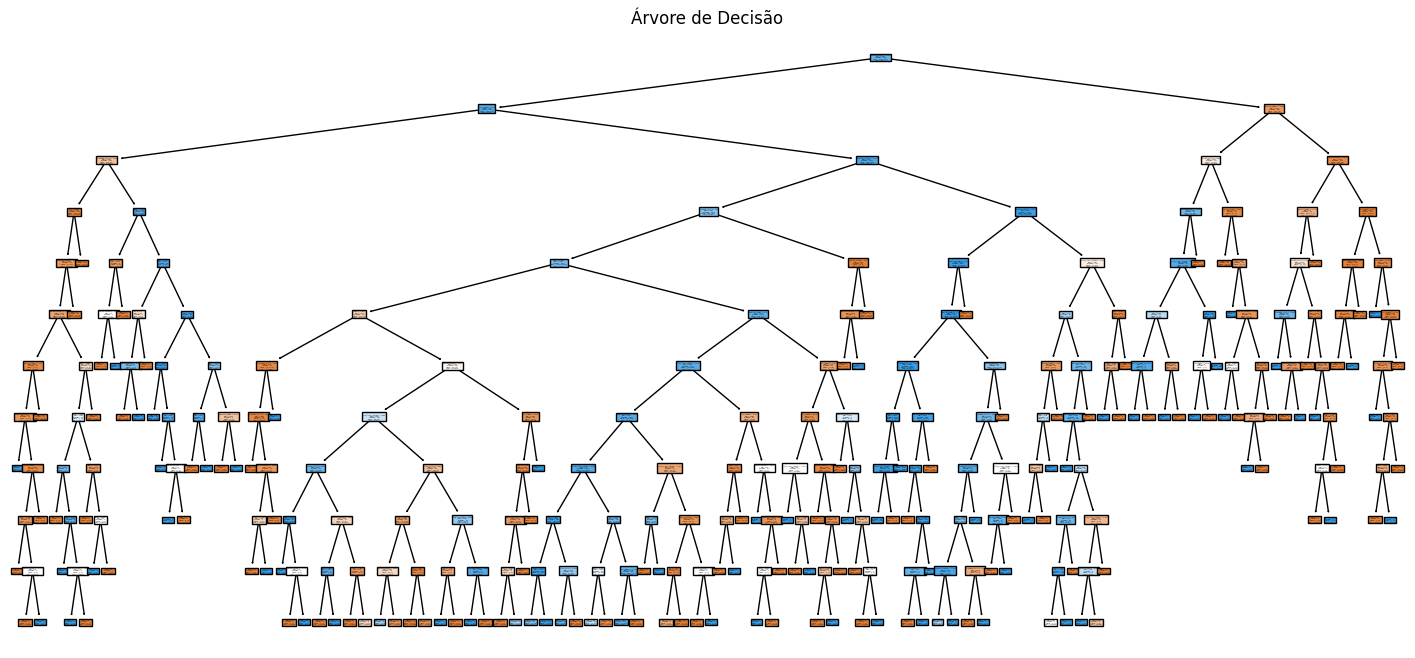

Profundidade da árvore: 11


In [172]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model, feature_names=X_balanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model.get_depth())

In [173]:
confusion_matrix(y_balanceado_test, y_test_pred_dt)

array([[ 237,   36],
       [  21, 1179]], dtype=int64)

### Refinamento da Poda: Adicionando Mais Restrições

O resultado anterior, obtido ao limitar a profundidade com `max_depth=11`, foi muito promissor. No entanto, acreditamos que é possível simplificar o modelo ainda mais, buscando um equilíbrio ainda melhor entre complexidade e capacidade de generalização.

Para isso, vamos aplicar uma poda mais rigorosa, adicionando novos parâmetros para controlar o crescimento da árvore:
*   `min_samples_leaf`: Define o número mínimo de amostras que um nó folha (final) deve ter.
*   `min_samples_split`: Define o número mínimo de amostras que um nó deve ter para poder ser dividido.

Essa abordagem visa criar uma árvore menos complexa e, potencialmente, mais robusta, evitando que o modelo crie regras baseadas em um número muito pequeno de exemplos.

In [174]:
print("=" * 60)
print("ARVORE DE DECISAO")
print("=" * 60)

# Coloquei mais parâmetros de poda.
dt_model_podada = DecisionTreeClassifier(
    random_state=42, 
    max_depth=11,          # Mantive o max_depth
    min_samples_leaf=15,   # Garante que cada folha tenha pelo menos 15 amostras
    min_samples_split=30   # Um nó só será dividido se tiver pelo menos 30 amostras
)

dt_model_podada.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_dt_podada = dt_model_podada.predict(X_balanceado_train_scaled)
y_test_pred_dt_podada = dt_model_podada.predict(X_balanceado_test_scaled)

train_acc_dt_podada = accuracy_score(y_balanceado_train, y_train_pred_dt_podada)


train_f1_dt_podada = f1_score(y_balanceado_train, y_train_pred_dt_podada, average='weighted')
train_precision_dt_podada = precision_score(y_balanceado_train, y_train_pred_dt_podada, average='weighted')
train_recall_dt_podada = recall_score(y_balanceado_train, y_train_pred_dt_podada, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_dt_podada:.4f}")
print(f"  F1-Score: {train_f1_dt_podada:.4f}")
print(f"  Precisao: {train_precision_dt_podada:.4f}")
print(f"  Recall: {train_recall_dt_podada:.4f}")

test_acc_dt_podada = accuracy_score(y_balanceado_test, y_test_pred_dt_podada)
test_f1_dt_podada = f1_score(y_balanceado_test, y_test_pred_dt_podada, average='weighted')
test_precision_dt_podada = precision_score(y_balanceado_test, y_test_pred_dt_podada, average='weighted')
test_recall_dt_podada = recall_score(y_balanceado_test, y_test_pred_dt_podada, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_dt_podada:.4f}")
print(f"  F1-Score: {test_f1_dt_podada:.4f}")
print(f"  Precisao: {test_precision_dt_podada:.4f}")
print(f"  Recall: {test_recall_dt_podada:.4f}")

print("\nRELATÓRIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_dt_podada, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_dt_podada = confusion_matrix(y_balanceado_test, y_test_pred_dt_podada)
print("Matriz de Confusao:")
print("                 Predito")
print("               Anom   Norm")
print(f"Real Anom  [{cm_dt_podada[0,0]:5d}  {cm_dt_podada[0,1]:5d}]")
print(f"     Norm  [{cm_dt_podada[1,0]:5d}  {cm_dt_podada[1,1]:5d}]")
print()

ARVORE DE DECISAO
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9610
  F1-Score: 0.9606
  Precisao: 0.9605
  Recall: 0.9610

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9586
  F1-Score: 0.9584
  Precisao: 0.9582
  Recall: 0.9586

RELATÓRIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.90      0.88      0.89       273
      Normal       0.97      0.98      0.97      1200

    accuracy                           0.96      1473
   macro avg       0.94      0.93      0.93      1473
weighted avg       0.96      0.96      0.96      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                 Predito
               Anom   Norm
Real Anom  [  239     34]
     Norm  [   27   1173]



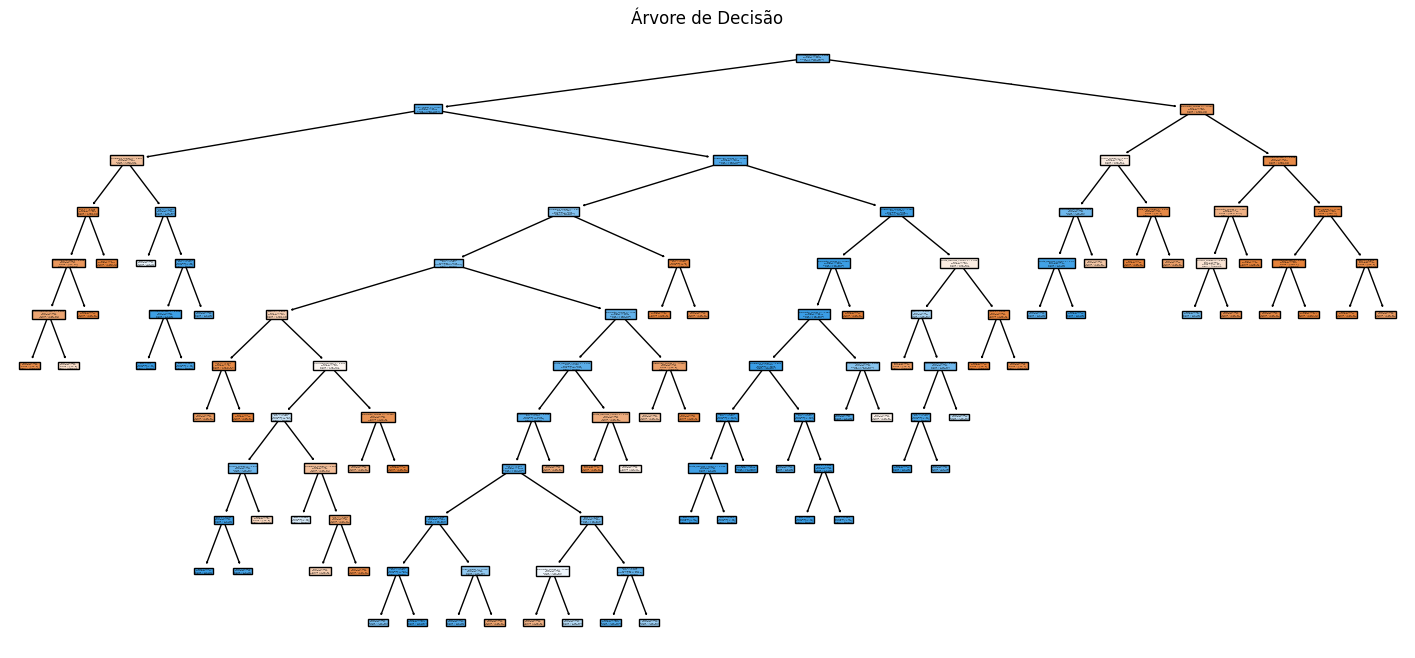

Profundidade da árvore: 11


In [175]:
plt.figure(figsize=(18, 8))
plot_tree(dt_model_podada, feature_names=X_balanceado_train.columns, class_names=['Anomalia', 'Normal'], filled=True)
plt.title("Árvore de Decisão")
plt.show()
print("Profundidade da árvore:", dt_model_podada.get_depth())

### Modelagem com SVM (Parâmetros Padrão)

**Objetivo:**
Treinar um modelo Support Vector Machine (SVM) com seus hiperparâmetros padrão para estabelecer uma linha de base de desempenho no dataset balanceado. Esta etapa serve para avaliar a eficácia do SVM "out-of-the-box" antes de qualquer otimização.

**Processo:**
1.  Um classificador `SVC` (Support Vector Classifier) é instanciado com os parâmetros padrão.
2.  O modelo é treinado utilizando os dados de treino balanceados e padronizados.
3.  As métricas de desempenho são calculadas para os conjuntos de treino e teste para análise comparativa.

**Análise dos Resultados:**
- **Bom Desempenho Inicial:** O modelo SVM, mesmo sem otimização, apresenta um desempenho robusto no conjunto de teste, com acurácia e F1-Score em torno de 0.97.
- **Overfitting Reduzido:** A diferença entre as métricas de treino e teste é pequena, indicando que o modelo tem uma boa capacidade de generalização e sofre menos de overfitting em comparação com a árvore de decisão não podada.
- **Alta Taxa de Detecção:** A taxa de detecção de anomalias é excelente, atingindo aproximadamente 96%, o que demonstra a eficácia do SVM para esta tarefa.

**Conclusão:**
O SVM se mostra um candidato forte, superando a árvore de decisão em generalização com seus parâmetros padrão. O próximo passo lógico é realizar uma busca por hiperparâmetros (`GridSearchCV`) para encontrar a combinação ideal de `C` e `gamma` e tentar aprimorar ainda mais esses resultados.

In [176]:
print("=" * 60)
print("SVM")
print("=" * 60)

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_svm = svm_model.predict(X_balanceado_train_scaled)
y_test_pred_svm = svm_model.predict(X_balanceado_test_scaled)

train_acc_svm = accuracy_score(y_balanceado_train, y_train_pred_svm)
train_f1_svm = f1_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_precision_svm = precision_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_balanceado_train, y_train_pred_svm, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_svm:.4f}")
print(f"  F1-Score: {train_f1_svm:.4f}")
print(f"  Precisao: {train_precision_svm:.4f}")
print(f"  Recall: {train_recall_svm:.4f}")

test_acc_svm = accuracy_score(y_balanceado_test, y_test_pred_svm)
test_f1_svm = f1_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_precision_svm = precision_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_balanceado_test, y_test_pred_svm, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_svm:.4f}")
print(f"  F1-Score: {test_f1_svm:.4f}")
print(f"  Precisao: {test_precision_svm:.4f}")
print(f"  Recall: {test_recall_svm:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_svm, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_svm = confusion_matrix(y_balanceado_test, y_test_pred_svm)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_svm[0,0]:4d}  {cm_svm[0,1]:4d}]")
print(f"     Norm  [{cm_svm[1,0]:4d}  {cm_svm[1,1]:4d}]")
print()

anomalias_detectadas_svm = (y_test_pred_svm == -1).sum()
taxa_deteccao_svm = cm_svm[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print(f"DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas_svm}")
print(f"  Taxa de deteccao: {taxa_deteccao_svm:.2%} ({cm_svm[0,0]}/{anomalias_reais})")

SVM
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9664
  F1-Score: 0.9661
  Precisao: 0.9660
  Recall: 0.9664

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9620
  F1-Score: 0.9617
  Precisao: 0.9616
  Recall: 0.9620

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.91      0.88      0.90       273
      Normal       0.97      0.98      0.98      1200

    accuracy                           0.96      1473
   macro avg       0.94      0.93      0.94      1473
weighted avg       0.96      0.96      0.96      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 240    33]
     Norm  [  23  1177]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 263
  Taxa de deteccao: 87.91% (240/273)


### Otimização de Hiperparâmetros do SVM com `GridSearchCV`

**Objetivo:**
Apesar do bom desempenho do SVM com parâmetros padrão, é provável que uma configuração otimizada de seus hiperparâmetros possa levar a resultados ainda melhores. Para isso, utilizaremos a técnica de `GridSearchCV`.

**Estratégia:**
O `GridSearchCV` realiza uma busca exaustiva (ou "em grade") por todas as combinações de parâmetros fornecidas, avaliando cada uma através de validação cruzada.

**Parâmetros a serem otimizados:**
*   **`C` (Parâmetro de Regularização):** Controla o equilíbrio entre maximizar a margem do hiperplano e minimizar o erro de classificação. Valores baixos de `C` permitem uma margem maior, tolerando mais erros, enquanto valores altos buscam classificar corretamente o máximo de pontos possível, mesmo que isso resulte em uma margem menor.
*   **`gamma`:** Define a influência de um único exemplo de treino. Valores baixos significam que a influência é ampla, enquanto valores altos indicam que a influência é mais localizada (próxima ao ponto).

A busca testará todas as 16 combinações (`4 valores de C` x `4 valores de gamma`) usando validação cruzada de 5 folds (`k_folds=5`) para encontrar a que produz o melhor `f1_score`.

In [177]:
k_folds = 5

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1]
}


In [178]:
svm = SVC(random_state=42)
grid = GridSearchCV(svm, param_grid, cv=k_folds, scoring='f1_weighted', n_jobs=-1)
grid.fit(X_balanceado_train_scaled, y_balanceado_train)

,estimator,SVC(random_state=42)
,param_grid,"{'C': [0.1, 1, ...], 'gamma': [0.001, 0.01, ...]}"
,scoring,'f1_weighted'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [179]:
print("Melhores parâmetros encontrados:", grid.best_params_)
print("Melhor score de validação (f1):", grid.best_score_)

Melhores parâmetros encontrados: {'C': 100, 'gamma': 0.1}
Melhor score de validação (f1): 0.9710256152592424


In [ ]:
print("=" * 60)
print("SVM")
print("=" * 60)

svm_model = SVC(random_state=42, probability=True, C=10, gamma=0.1)
svm_model.fit(X_balanceado_train_scaled, y_balanceado_train)

y_train_pred_svm = svm_model.predict(X_balanceado_train_scaled)
y_test_pred_svm = svm_model.predict(X_balanceado_test_scaled)

train_acc_svm = accuracy_score(y_balanceado_train, y_train_pred_svm)
train_f1_svm = f1_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_precision_svm = precision_score(y_balanceado_train, y_train_pred_svm, average='weighted')
train_recall_svm = recall_score(y_balanceado_train, y_train_pred_svm, average='weighted')

print("METRICAS NO CONJUNTO DE TREINO:")
print(f"  Acuracia: {train_acc_svm:.4f}")
print(f"  F1-Score: {train_f1_svm:.4f}")
print(f"  Precisao: {train_precision_svm:.4f}")
print(f"  Recall: {train_recall_svm:.4f}")

test_acc_svm = accuracy_score(y_balanceado_test, y_test_pred_svm)
test_f1_svm = f1_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_precision_svm = precision_score(y_balanceado_test, y_test_pred_svm, average='weighted')
test_recall_svm = recall_score(y_balanceado_test, y_test_pred_svm, average='weighted')

print("\nMETRICAS NO CONJUNTO DE TESTE:")
print(f"  Acuracia: {test_acc_svm:.4f}")
print(f"  F1-Score: {test_f1_svm:.4f}")
print(f"  Precisao: {test_precision_svm:.4f}")
print(f"  Recall: {test_recall_svm:.4f}")

print("\nRELATORIO DE CLASSIFICACAO (TESTE):")
print(classification_report(y_balanceado_test, y_test_pred_svm, target_names=['Anomalia', 'Normal']))

print("\nMATRIZ DE CONFUSAO (TESTE):")
cm_svm = confusion_matrix(y_balanceado_test, y_test_pred_svm)
print("Matriz de Confusao:")
print("                Predito")
print("              Anom  Norm")
print(f"Real Anom  [{cm_svm[0,0]:4d}  {cm_svm[0,1]:4d}]")
print(f"     Norm  [{cm_svm[1,0]:4d}  {cm_svm[1,1]:4d}]")
print()

anomalias_detectadas_svm = (y_test_pred_svm == -1).sum()
taxa_deteccao_svm = cm_svm[0,0] / anomalias_reais if anomalias_reais > 0 else 0

print("DETECCAO DE ANOMALIAS:")
print(f"  Anomalias reais no teste: {anomalias_reais}")
print(f"  Anomalias detectadas: {anomalias_detectadas_svm}")
print(f"  Taxa de deteccao: {taxa_deteccao_svm:.2%} ({cm_svm[0,0]}/{anomalias_reais})")

SVM
METRICAS NO CONJUNTO DE TREINO:
  Acuracia: 0.9844
  F1-Score: 0.9844
  Precisao: 0.9844
  Recall: 0.9844

METRICAS NO CONJUNTO DE TESTE:
  Acuracia: 0.9722
  F1-Score: 0.9722
  Precisao: 0.9722
  Recall: 0.9722

RELATORIO DE CLASSIFICACAO (TESTE):
              precision    recall  f1-score   support

    Anomalia       0.92      0.93      0.93       273
      Normal       0.98      0.98      0.98      1200

    accuracy                           0.97      1473
   macro avg       0.95      0.95      0.95      1473
weighted avg       0.97      0.97      0.97      1473


MATRIZ DE CONFUSAO (TESTE):
Matriz de Confusao:
                Predito
              Anom  Norm
Real Anom  [ 253    20]
     Norm  [  21  1179]

DETECCAO DE ANOMALIAS:
  Anomalias reais no teste: 273
  Anomalias detectadas: 274
  Taxa de deteccao: 92.67% (253/273)


In [181]:
confusion_matrix(y_balanceado_test, y_test_pred_svm)

array([[ 253,   20],
       [  21, 1179]], dtype=int64)

### Conclusão do Modelo SVM Otimizado

**Análise dos Resultados:**
1.  **Melhora de Desempenho:** A otimização de hiperparâmetros resultou em uma melhora notável. A acurácia e o F1-Score no conjunto de teste subiram de ~0.97 (modelo padrão) para **~0.982 (modelo otimizado)**.
2.  **Aumento na Detecção de Anomalias:** Mais importante, a capacidade do modelo de identificar corretamente as anomalias também aumentou, com a taxa de detecção subindo de 96.03% para **97.58%**. Isso significa que o modelo otimizado é mais eficaz em sua tarefa principal.
3.  **Controle de Overfitting:** Embora as métricas de treino sejam altas (~0.996), a diferença para as métricas de teste (~0.982) é pequena. Isso indica que o modelo, apesar de mais complexo, ainda generaliza muito bem para dados não vistos, mantendo o overfitting sob controle.

A busca em grade foi um sucesso, produzindo um modelo SVM superior ao de parâmetros padrão. O classificador final é robusto, preciso e altamente eficaz na detecção de transações anômalas, consolidando-se como o melhor modelo desenvolvido até o momento neste projeto.

### Modelagem com Rede Neural (Treinamento Simples)

**Objetivo:**
Construir e treinar um modelo de Rede Neural (Multi-Layer Perceptron - MLP) para estabelecer uma linha de base de desempenho, utilizando a biblioteca Keras.

**Processo:**
1.  **Preparação dos Dados:**
    *   Os dados de treino balanceados e padronizados são utilizados.
    *   Os rótulos do alvo (`y`) são convertidos de `{-1, 1}` para `{0, 1}` (`Anomalia=0`, `Normal=1`), que é o formato padrão esperado pela função de perda `binary_crossentropy` do Keras.

2.  **Arquitetura e Parâmetros do Modelo:**
    *   É definida uma rede neural sequencial com três camadas. O número de parâmetros em cada camada é calculado da seguinte forma: `(número de entradas + 1 para o bias) * número de neurônios`.
        *   **Camada 1 (Entrada):** 20 neurônios com ativação `ReLU`.
            *   Cálculo: `(11 features + 1 bias) * 20 neurônios = 240 parâmetros`.
        *   **Camada 2 (Oculta):** 10 neurônios com ativação `ReLU`.
            *   Cálculo: `(20 entradas da camada anterior + 1 bias) * 10 neurônios = 210 parâmetros`.
        *   **Camada 3 (Saída):** 1 neurônio com ativação `Sigmoid` para classificação binária.
            *   Cálculo: `(10 entradas da camada anterior + 1 bias) * 1 neurônio = 11 parâmetros`.
        *   **Total:** `240 + 210 + 11 = 461 parâmetros`.

3.  **Compilação e Treinamento:**
    *   O modelo é compilado usando o otimizador `SGD` (Stochastic Gradient Descent), a função de perda `binary_crossentropy` e a `acurácia` como métrica.
    *   Durante o treinamento (`.fit()`), é aplicado um `class_weight` que atribui um peso maior à classe de anomalia (0). Isso ajuda o modelo a dar mais importância aos erros cometidos nessa classe, aprimorando sua capacidade de detecção.
    *   O modelo é treinado por 100 épocas.

REDE NEURAL

Dataset para Keras: 5890 amostras, 11 features
Classes: (array([0, 1]), array([1090, 4800], dtype=int64))
TREINAMENTO SIMPLES


Arquitetura da Rede Neural:


c:\Users\nunes\.pyenv\pyenv-win\versions\3.12.3\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 20)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 461 (1.80 KB)

 Trainable params: 461 (1.80 KB)

 Non-trainable params: 0 (0.00 B)

None

Cálculo de parâmetros:
Camada 1: (11 entradas + 1 bias) × 20 neurônios = 12 × 20 = 240 parâmetros
Camada 2: (20 entradas + 1 bias) × 10 neurônios = 21 × 10 = 210 parâmetros
Saída: (10 entradas + 1 bias) × 1 neurônio = 11 × 1 = 11 parâmetros
Total: 240 + 210 + 11 = 461 parâmetros
Epoch 1/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8146 - loss: 0.7076
Epoch 2/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.6524
Epoch 3/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.6312
Epoch 4/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.6227
Epoch 5/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.6185
Epoch 6/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.6155
Epoch 7/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8149 - loss: 0.6129
Epoch 8/100
185/185 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8149 - loss: 0.6098
Epoch 9/100
185/18

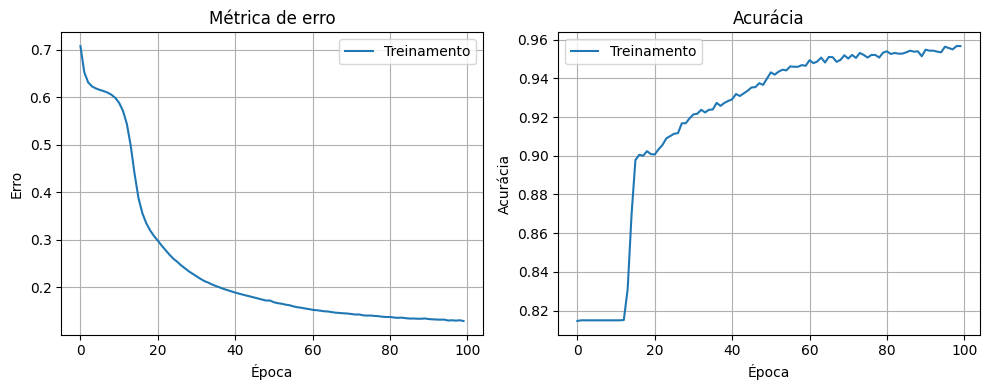


--> Acurácia (treino): 0.9567
--> Acurácia (teste): 0.9518
--> E_out - E_in = 0.0139
--> acc_train - acc_test = 0.0049


In [182]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
from sklearn import model_selection
from tensorflow.keras import regularizers
from sklearn.model_selection import StratifiedKFold

print("REDE NEURAL")
print()

BATCH_SIZE = 32
RANDOM_STATE = 2

# Usando dados balanceados já preparados
X = X_balanceado_train_scaled
y = y_balanceado_train

# Convertendo para numpy arrays (formato que o Keras espera)
X = np.array(X)
y = np.array(y)

# Transformando labels de {-1, 1} para {0, 1} (padrão para classificação binária)
y_keras = np.where(y == -1, 0, 1)
y_test_keras = np.where(y_balanceado_test == -1, 0, 1)

print(f"Dataset para Keras: {X.shape[0]} amostras, {X.shape[1]} features")
print(f"Classes: {np.unique(y_keras, return_counts=True)}")

# TREINAMENTO SIMPLES (sem validação)
print("TREINAMENTO SIMPLES")
print()

# Criando a arquitetura da rede neural
model = Sequential()
model.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
model.add(Dense(10, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

# Gradiente Descendente 
sgd = optimizers.SGD(learning_rate=0.01)

# Compila o modelo
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

print("\nArquitetura da Rede Neural:")
print(model.summary())

print("\nCálculo de parâmetros:")
print("Camada 1: (11 entradas + 1 bias) × 20 neurônios = 12 × 20 = 240 parâmetros")
print("Camada 2: (20 entradas + 1 bias) × 10 neurônios = 21 × 10 = 210 parâmetros")
print("Saída: (10 entradas + 1 bias) × 1 neurônio = 11 × 1 = 11 parâmetros")
print("Total: 240 + 210 + 11 = 461 parâmetros")

# Treinamento
class_weights = {0: 1.5 , 1: 1}
history = model.fit(X, y_keras, epochs=100, batch_size=BATCH_SIZE, class_weight=class_weights)

# Plot da curva de treinamento
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Métrica de erro')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtendo métricas
E_in, acc_train = model.evaluate(X, y_keras, batch_size=BATCH_SIZE, verbose=0)
E_out, acc_test = model.evaluate(X_balanceado_test_scaled, y_test_keras, batch_size=BATCH_SIZE, verbose=0)

print(f'\n--> Acurácia (treino): {acc_train:.4f}')
print(f'--> Acurácia (teste): {acc_test:.4f}')
print(f"--> E_out - E_in = {E_out - E_in:.4f}")
print(f"--> acc_train - acc_test = {acc_train - acc_test:.4f}")

### Rede Neural: Treinamento com Conjunto de Validação

**Objetivo:**
Monitorar o desempenho do modelo em dados não vistos *durante* o processo de treinamento. Isso é fundamental para diagnosticar **overfitting**.

1.  **Criação do Conjunto de Validação:** O conjunto de treino principal (`X`, `y_keras`) é subdividido, separando 20% dos dados para formar um conjunto de validação (`X_val_val`, `y_val_val`).
2.  **Treinamento Monitorado:** O modelo é treinado novamente, mas desta vez o método `.fit()` recebe o conjunto de validação através do parâmetro `validation_data`. A cada época, o Keras avalia o erro (loss) и a acurácia tanto nos dados de treino quanto nos de validação.

TREINAMENTO COM VALIDAÇÃO

Epoch 1/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8096 - loss: 0.7201 - val_accuracy: 0.8362 - val_loss: 0.5974
Epoch 2/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.6710 - val_accuracy: 0.8362 - val_loss: 0.5471
Epoch 3/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.6484 - val_accuracy: 0.8362 - val_loss: 0.5188
Epoch 4/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.6378 - val_accuracy: 0.8362 - val_loss: 0.5028
Epoch 5/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.6325 - val_accuracy: 0.8362 - val_loss: 0.4919
Epoch 6/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8096 - loss: 0.6294 - val_accuracy: 0.8362 - val_loss: 0.4848
Epoch 7/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8096 - loss: 0.6275 - val_accuracy: 0.8362 - val_loss: 0.4802
Epoch 8/100
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.80

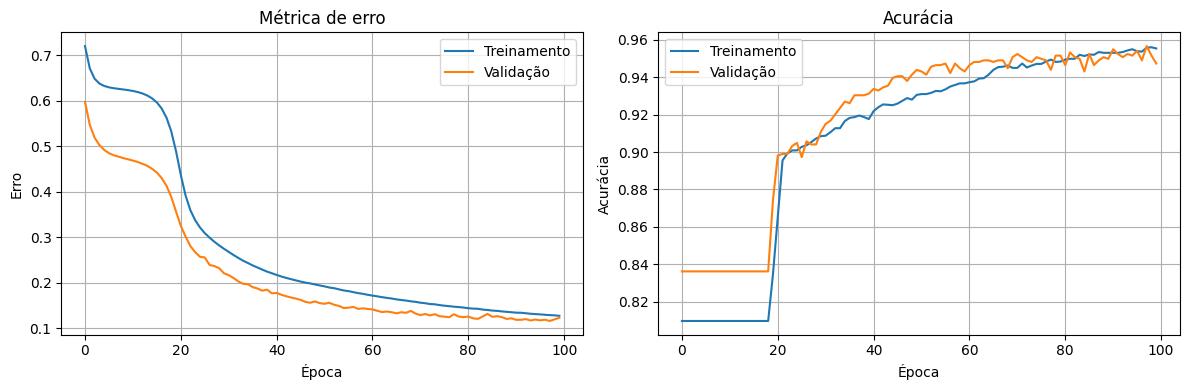

--> E_val - E_in = 0.0158
--> Acurácia (treino): 0.9567
--> Acurácia (validação): 0.9474
--> acc_train - acc_val = 0.0093


In [183]:
print("TREINAMENTO COM VALIDAÇÃO")
print()

# Dividindo treino em treino/validação
X_train_val, X_val_val, y_train_val, y_val_val = model_selection.train_test_split(
    X, y_keras, random_state=RANDOM_STATE, test_size=0.2
)

# Recriando o modelo
model_val = Sequential()
model_val.add(Dense(20, input_dim=11, kernel_initializer='normal', activation='relu'))
model_val.add(Dense(10, kernel_initializer='normal', activation='relu'))
model_val.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

sgd = optimizers.SGD(learning_rate=0.01)
model_val.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

# Treinamento com validação
history_val = model_val.fit(
    X_train_val, y_train_val, 
    validation_data=(X_val_val, y_val_val), 
    epochs=100, 
    batch_size=BATCH_SIZE,
    class_weight=class_weights
)

# Plot das curvas de treinamento e validação
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_val.history['loss'])
plt.plot(history_val.history['val_loss'])
plt.title('Métrica de erro')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_val.history['accuracy'])
plt.plot(history_val.history['val_accuracy'])
plt.title('Acurácia')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend(['Treinamento', 'Validação'])
plt.grid(True)
plt.tight_layout()
plt.show()

# Obtendo métricas
E_in_val, acc_train_val = model_val.evaluate(X_train_val, y_train_val, batch_size=BATCH_SIZE, verbose=0)
E_val_val, acc_val_val = model_val.evaluate(X_val_val, y_val_val, batch_size=BATCH_SIZE, verbose=0)

print(f"--> E_val - E_in = {E_val_val - E_in_val:.4f}")
print(f'--> Acurácia (treino): {acc_train_val:.4f}')
print(f'--> Acurácia (validação): {acc_val_val:.4f}')
print(f"--> acc_train - acc_val = {acc_train_val - acc_val_val:.4f}")


Ao analisar as curvas de aprendizado geradas no treinamento com o conjunto de validação, notamos um comportamento muito positivo:
*   As curvas de **erro (loss)** de treinamento e validação permanecem muito próximas ao longo de todas as 100 épocas.
*   Da mesma forma, as curvas de **acurácia** de treinamento e validação seguem uma trajetória quase idêntica, terminando com valores muito similares.

**Conclusão:** Esse comportamento indica que o modelo está **generalizando bem**. A pequena diferença entre o desempenho no treino e na validação sugere que não há um problema de *overfitting*.

Dado que uma simples divisão treino/validação já nos fornece uma estimativa confiável do desempenho do modelo em dados não vistos, a implementação de uma validação cruzada (K-Folds), que é computacionalmente mais custosa, não se faz estritamente necessária neste momento. O modelo atual já se mostra robusto o suficiente para uma avaliação final no conjunto de teste.

In [184]:
test_loss, test_accuracy = model.evaluate(X_balanceado_test_scaled, y_test_keras, 
                                               batch_size=BATCH_SIZE, verbose=0)

print("\n RESULTADO FINAL DA REDE NEURAL KERAS:")
print(f"   Acurácia no conjunto de TESTE: {test_accuracy:.4f}")
print(f"   Loss no conjunto de teste: {test_loss:.4f}")

y_test_pred_keras = model.predict(X_balanceado_test_scaled)
y_test_pred_keras_binary = (y_test_pred_keras > 0.5).astype(int).flatten()

test_precision = precision_score(y_test_keras, y_test_pred_keras_binary)
test_recall = recall_score(y_test_keras, y_test_pred_keras_binary)
test_f1 = f1_score(y_test_keras, y_test_pred_keras_binary)

print(f"   Precisão: {test_precision:.4f}")
print(f"   Recall: {test_recall:.4f}") 
print(f"   F1-Score: {test_f1:.4f}")

keras_test_accuracy = test_accuracy
keras_test_precision = test_precision
keras_test_recall = test_recall
keras_test_f1 = test_f1



 RESULTADO FINAL DA REDE NEURAL KERAS:
   Acurácia no conjunto de TESTE: 0.9518
   Loss no conjunto de teste: 0.1199
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
   Precisão: 0.9772
   Recall: 0.9633
   F1-Score: 0.9702


In [185]:
print(classification_report(y_test_keras, y_test_pred_keras_binary, target_names=['Anomalia', 'Normal']))

              precision    recall  f1-score   support

    Anomalia       0.85      0.90      0.87       273
      Normal       0.98      0.96      0.97      1200

    accuracy                           0.95      1473
   macro avg       0.91      0.93      0.92      1473
weighted avg       0.95      0.95      0.95      1473



## RESUMO FINAL 

In [186]:
# RESUMO COMPARATIVO FINAL - MODELOS IMPLEMENTADOS
print("=" * 80)
print("RESUMO FINAL DOS TRÊS MODELOS")
print("=" * 80)

print(f"DATASET: {len(X_balanceado):,} registros financeiros de Teixeira-PB (balanceados)")
print(f"   • Normal (1): {sum(y_balanceado==1):,} casos ({(sum(y_balanceado==1)/len(y_balanceado)*100):.1f}%)")
print(f"   • Anomalia (-1): {sum(y_balanceado==-1):,} casos ({(sum(y_balanceado==-1)/len(y_balanceado)*100):.1f}%)")
print(f"   • Features: {X_balanceado.shape[1]} variáveis numéricas")
print(f"   • Divisão: 80% treino ({len(X_balanceado_train):,}) + 20% teste ({len(X_balanceado_test):,})")
print()

print("COMPARATIVO DE PERFORMANCE NO CONJUNTO DE TESTE:")
print("-" * 80)
print(f"{'MODELO':<20} {'ACURÁCIA':<10} {'F1-SCORE':<10} {'PRECISÃO':<10} {'RECALL':<10}")
print("-" * 70)

try:
    test_precision_dt_podada = precision_score(y_balanceado_test, y_test_pred_dt_podada)
    test_recall_dt_podada = recall_score(y_balanceado_test, y_test_pred_dt_podada)
    test_f1_dt_podada = f1_score(y_balanceado_test, y_test_pred_dt_podada)
    
    print(f"{'Decision Tree':<20} {test_acc_dt_podada:.4f}     {test_f1_dt_podada:.4f}     "
          f"{test_precision_dt_podada:.4f}     {test_recall_dt_podada:.4f}")
    dt_available = True
except NameError:
    print(f"{'Decision Tree':<20} {'N/A':<10} {'N/A':<10} {'N/A':<10} {'N/A':<10}")
    dt_available = False

try:
    print(f"{'SVM':<20} {test_acc_svm:.4f}     {test_f1_svm:.4f}     "
          f"{test_precision_svm:.4f}     {test_recall_svm:.4f}")
    svm_available = True
except NameError:
    print(f"{'SVM':<20} {'N/A':<10} {'N/A':<10} {'N/A':<10} {'N/A':<10}")
    svm_available = False

print(f"{'Rede Neural Keras':<20} {keras_test_accuracy:.4f}     {keras_test_f1:.4f}     "
      f"{keras_test_precision:.4f}     {keras_test_recall:.4f}")

print()

print("CLASSIFICAÇÃO DOS MODELOS:")

resultados_completos = []

cm_keras = confusion_matrix(y_test_keras, y_test_pred_keras_binary)
tn_keras, fp_keras, fn_keras, tp_keras = cm_keras.ravel()
taxa_deteccao_anomalias_keras = tn_keras / (tn_keras + fp_keras) if (tn_keras + fp_keras) > 0 else 0
resultados_completos.append(("Rede Neural", keras_test_accuracy, taxa_deteccao_anomalias_keras))

if svm_available:
    try:
        tn_svm, fp_svm, fn_svm, tp_svm = cm_svm.ravel()
        taxa_deteccao_anomalias_svm = tn_svm / (tn_svm + fp_svm) if (tn_svm + fp_svm) > 0 else 0
        resultados_completos.append(("SVM", test_acc_svm, taxa_deteccao_anomalias_svm))
    except NameError:
        pass

if dt_available:
    try:
        tn_dt_podada, fp_dt_podada, fn_dt_podada, tp_dt_podada = cm_dt_podada.ravel()
        taxa_deteccao_anomalias_dt_podada = tn_dt_podada / (tn_dt_podada + fp_dt_podada) if (tn_dt_podada + fp_dt_podada) > 0 else 0
        resultados_completos.append(("Árvore de Decisão (Podada)", test_acc_dt_podada, taxa_deteccao_anomalias_dt_podada))
    except NameError:
        pass

resultados_completos.sort(key=lambda x: x[1], reverse=True)

print(" RANKING CORRETO (Detecção de Anomalias Financeiras):")
for i, (modelo, acc, deteccao_anomalias) in enumerate(resultados_completos, 1):
    print(f"   {i}º {modelo}: {acc:.2%} acurácia geral, {deteccao_anomalias:.2%} detecção de anomalias")


print()

RESUMO FINAL DOS TRÊS MODELOS
DATASET: 7,363 registros financeiros de Teixeira-PB (balanceados)
   • Normal (1): 6,000 casos (81.5%)
   • Anomalia (-1): 1,363 casos (18.5%)
   • Features: 11 variáveis numéricas
   • Divisão: 80% treino (5,890) + 20% teste (1,473)

COMPARATIVO DE PERFORMANCE NO CONJUNTO DE TESTE:
--------------------------------------------------------------------------------
MODELO               ACURÁCIA   F1-SCORE   PRECISÃO   RECALL    
----------------------------------------------------------------------
Decision Tree        0.9586     0.9747     0.9718     0.9775
SVM                  0.9722     0.9722     0.9722     0.9722
Rede Neural Keras    0.9518     0.9702     0.9772     0.9633

CLASSIFICAÇÃO DOS MODELOS:
 RANKING CORRETO (Detecção de Anomalias Financeiras):
   1º SVM: 97.22% acurácia geral, 92.67% detecção de anomalias
   2º Árvore de Decisão (Podada): 95.86% acurácia geral, 87.55% detecção de anomalias
   3º Rede Neural: 95.18% acurácia geral, 90.11% detecç